- Nhóm 10
- Học viên:
    - Phạm Thị Hoà - 23C23007
    - Trịnh Quang Trí - 23C23010

- Bộ dữ liệu: CSM (Conventional and Social Media Movies) cung cấp một số thuộc tính của phim ảnh lấy từ nguồn UCI Machine Learning Repository.
    - "Movie": tên phim,
    - "Year": năm phát hành,
    - "Ratings": điểm đánh giá,
    - "Genre": thể loại phim,
    - "Gross": tổng doanh thu,
    - "Budget": tổng chi phí,
    - "Screens": số rạp chiều,
    - "Sequel": phần phim,
    - "Sentiment": ý kiến khán giả,
    - "Views": số lượt xem,
    - "Likes": số lượt thích,
    - "Dislikes": số lượt chê,
    - "Comments": số bình luận,
    - "Aggregate Followers": số người theo dõi.

In [1]:
# Các thư viện cần thiết
library(glue)
library(readxl)
library(ggplot2)
library(car)
library(MASS)
library(lmtest)
library(caret)
library(magrittr)
options(warn = -1)
set.seed(42)

Loading required package: carData

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: lattice



In [2]:
# Đường dẫn tới file hiện tại
base_path <- getwd()
setwd(base_path)

In [3]:
file_name = "CSM.xlsx"
file_path = paste(base_path, glue("../dataset/{file_name}"), sep = "/")
file_path

[1] "/Users/hoapham/Downloads/Project/code/../dataset/CSM.xlsx"

In [4]:
# Đọc dữ liệu
df <- read_excel(file_path, sheet = "Sheet1")
head(df)

Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13 Sins,2014,6.3,8,9.13e+03,4.0e+06,45,1,0,3280543,4632,425,636,1120000
22 Jump Street,2014,7.1,1,1.92e+08,5.0e+07,3306,2,2,583289,3465,61,186,12350000
3 Days to Kill,2014,6.2,1,3.07e+07,2.8e+07,2872,1,0,304861,328,34,47,483000
300: Rise of an Empire,2014,6.3,1,1.06e+08,1.1e+08,3470,2,0,452917,2429,132,590,568000
A Haunted House 2,2014,4.7,8,1.73e+07,3.5e+06,2310,2,0,3145573,12163,610,1082,1923800
A Long Way Off,2014,4.6,3,2.90e+04,5.0e+05,NA,1,0,91137,112,7,1,310000


## TIỀN XỬ LÝ DỮ LIỆU

In [5]:
print(glue("So dong cua du lieu: {nrow(df)}"))
print(glue("So cot cua du lieu: {ncol(df)}"))

So dong cua du lieu: 231
So cot cua du lieu: 14


In [6]:
print("Cau truc cua du lieu: ")
print(str(df))

[1] "Cau truc cua du lieu: "
tibble [231 x 14] (S3: tbl_df/tbl/data.frame)
 $ Movie              : chr [1:231] "13 Sins" "22 Jump Street" "3 Days to Kill" "300: Rise of an Empire" ...
 $ Year               : num [1:231] 2014 2014 2014 2014 2014 ...
 $ Ratings            : num [1:231] 6.3 7.1 6.2 6.3 4.7 4.6 6.1 7.1 6.5 6.1 ...
 $ Genre              : num [1:231] 8 1 1 1 8 3 8 1 10 8 ...
 $ Gross              : num [1:231] 9.13e+03 1.92e+08 3.07e+07 1.06e+08 1.73e+07 2.90e+04 4.26e+07 5.75e+06 2.60e+07 4.86e+07 ...
 $ Budget             : num [1:231] 4.00e+06 5.00e+07 2.80e+07 1.10e+08 3.50e+06 5.00e+05 4.00e+07 2.00e+07 2.80e+07 1.25e+07 ...
 $ Screens            : num [1:231] 45 3306 2872 3470 2310 ...
 $ Sequel             : num [1:231] 1 2 1 2 2 1 1 1 1 1 ...
 $ Sentiment          : num [1:231] 0 2 0 0 0 0 0 2 3 0 ...
 $ Views              : num [1:231] 3280543 583289 304861 452917 3145573 ...
 $ Likes              : num [1:231] 4632 3465 328 2429 12163 ...
 $ Dislikes           : n

Chi tiết các cột trong bộ dữ liệu
- Movie (chr): Tên của các bộ phim.
Dữ liệu dạng chuỗi (character).
Ví dụ: "13 Sins", "22 Jump Street", "3 Days to Kill",...
- Year (num): Năm phát hành của các bộ phim.
Dữ liệu dạng số (numeric).
Ví dụ: 2014, 2014, 2014, 2014,...
- Ratings (num): Điểm đánh giá của các bộ phim.
Dữ liệu dạng số (numeric).
Ví dụ: 6.3, 7.1, 6.2, 6.3,...
- Genre (num): Mã thể loại của các bộ phim.
Dữ liệu dạng số (numeric), có thể cần map lại để biết thể loại tương ứng.
Ví dụ: 8, 1, 1, 1,...
- Gross (num): Doanh thu của các bộ phim (USD).
Dữ liệu dạng số (numeric).
Ví dụ: 9.13e+03, 1.92e+08, 3.07e+07,...
- Budget (num): Ngân sách sản xuất của các bộ phim (USD).
Dữ liệu dạng số (numeric).
Ví dụ: 4.00e+06, 5.00e+07, 2.80e+07,...
- Screens (num): Số lượng rạp chiếu.
Dữ liệu dạng số (numeric).
Ví dụ: 45, 3306, 2872,...
- Sequel (num): Số phần của bộ phim.
Dữ liệu dạng số (numeric).
Ví dụ: 1, 2, 1, 2,...
- Sentiment (num): Chỉ số cảm xúc về phim trên mạng xã hội (ý kiên skhans giả).
Dữ liệu dạng số (numeric).
Ví dụ: 0, 2, 0, 0,...
- Views (num): Số lượt xem.
Dữ liệu dạng số (numeric).
Ví dụ: 3280543, 583289, 304861,...
- Likes (num): Số lượt thích.
Dữ liệu dạng số (numeric).
Ví dụ: 4632, 3465, 328,...
- Dislikes (num): Số lượt không thích.
Dữ liệu dạng số (numeric).
Ví dụ: 425, 61, 34,...
- Comments (num): Số lượng bình luận.
Dữ liệu dạng số (numeric).
Ví dụ: 636, 186, 47,...
- Aggregate Followers (num): Tổng số người theo dõi.
Dữ liệu dạng số (numeric).
Ví dụ: 1120000, 12350000, 483000,...

- Một số cột có giá trị số rất lớn (ví dụ: Gross, Budget), có thể cần chuyển đổi đơn vị hoặc định dạng lại khi hiển thị.

- Cột Movie là tên phim, không có ý nghĩa cho việc phân tích, do đó ta loại biến Movie ra khỏi bộ dữ liệu df

In [7]:
# Loại cột Movie ra khỏi df
df <- subset(df, select = -Movie)

In [8]:
# Kiểm tra dữ liệu unique của bộ dữ liệu
print("unique cua tung cot")
for (col in colnames(df)) {
        len_col <- length(unique(df[[col]]))
        print(glue("{col}: {len_col}"))
    }

[1] "unique cua tung cot"
Year: 2
Ratings: 45
Genre: 11
Gross: 215
Budget: 105
Screens: 201
Sequel: 7
Sentiment: 36
Views: 231
Likes: 227
Dislikes: 203
Comments: 213
Aggregate Followers: 191


- Movie: 231
    - Mỗi bộ phim là duy nhất, không có sự lặp lại trong tên phim.
    - Điều này hợp lý vì mỗi bộ phim có một tiêu đề riêng biệt.
- Year: 2
    - Chỉ có 2 năm phát hành trong bộ dữ liệu.
    - Có thể là bộ dữ liệu chỉ tập trung vào phim của 2 năm cụ thể.
- Ratings: 45
    - Có 45 giá trị đánh giá duy nhất.
    - Điều này cho thấy một phạm vi đa dạng trong điểm đánh giá của các phim.
- Genre: 11
    - Có 11 thể loại phim khác nhau.
    - Điều này phản ánh sự đa dạng về thể loại trong bộ dữ liệu.
- Gross: 215
    - Có 215 giá trị doanh thu duy nhất.
    - Phần lớn các phim có doanh thu khác nhau, cho thấy sự đa dạng về thành công thương mại.
- Budget: 105
    - Có 105 giá trị ngân sách duy nhất.
    - Sự đa dạng về ngân sách cho thấy các phim được sản xuất với các mức đầu tư khác nhau.
- Screens: 201
    - Có 201 giá trị số lượng rạp duy nhất.
    - Điều này cho thấy các phim được chiếu ở nhiều quy mô khác nhau.
- Sequel: 7
    - Có 7 giá trị duy nhất cho phần tiếp theo.
    - Cần kiểm tra lại ý nghĩa của các giá trị này (có thể là các mã chỉ định trạng thái của phim liên quan đến việc có phải là phần tiếp theo hay không).
- Sentiment: 36
    - Có 36 giá trị cảm xúc duy nhất.
    - Điều này phản ánh sự đa dạng về phản ứng của khán giả đối với các phim.
- Views: 231
    - Có 231 giá trị số lượt xem duy nhất.
    - Mỗi phim có số lượt xem khác nhau, không có sự trùng lặp.
- Likes: 227
    - Có 227 giá trị số lượt thích duy nhất.
    - Hầu hết các phim có số lượt thích khác nhau, chỉ một vài phim có số lượt thích giống nhau.
- Dislikes: 203
    - Có 203 giá trị số lượt không thích duy nhất.
    - Tương tự như số lượt thích, phần lớn các phim có số lượt không thích khác nhau.
- Comments: 213
    - Có 213 giá trị số lượng bình luận duy nhất.
    - Số lượng bình luận đa dạng cho thấy mức độ tương tác khác nhau của khán giả với các phim.
- Aggregate Followers: 191
    - Có 191 giá trị số lượng người theo dõi tổng hợp duy nhất.
    - Điều này cho thấy sự khác biệt về mức độ phổ biến của các phim trên các nền tảng mạng xã hội.

In [9]:
# Nhận định biến liên tục và biến phân loại:
ploai_cols = c("Year", "Genre", "Sequel")
ploai_cols
ltuc_cols = setdiff(colnames(df), ploai_cols)
ltuc_cols

[1] "Year"   "Genre"  "Sequel"

[1] "Ratings"             "Gross"               "Budget"             
 [4] "Screens"             "Sentiment"           "Views"              
 [7] "Likes"               "Dislikes"            "Comments"           
[10] "Aggregate Followers"

In [10]:
# Kiểm tra giá trị thiếu
print("Gia tri bi thieu:")
data.frame(colSums(is.na(df)))

[1] "Gia tri bi thieu:"


,colSums.is.na.df..
,<dbl>
Year,0
Ratings,0
Genre,0
Gross,0
Budget,1
Screens,10
Sequel,0
Sentiment,0
Views,0


In [11]:
check_missing_value_function <- function(df, list_col = c("")) {
    if (list_col[1] == "") {
        list_col <- names(df)
    }
    missing_df_all <- data.frame()
    for (col in list_col) {
        missing_rows <- which(is.na(df[[col]]))
        missing_df <- df[missing_rows, ]
        missing_df_all <- rbind(missing_df_all, missing_df)
    }
    missing_percent <- nrow(missing_df_all) / nrow(df) * 100
    print(glue("Du lieu co {nrow(missing_df_all)} dong bi thieu, chiem {missing_percent}%"))
    return(missing_df_all)
}

In [12]:
check_missing_value_function(df, colnames(df))

Du lieu co 46 dong bi thieu, chiem 19.9134199134199%


Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,7.0,8,2.82e+06,NA,432,1,0,10747,4,1,1,818000
2014,4.6,3,2.90e+04,500000,NA,1,0,91137,112,7,1,310000
2014,7.0,3,9.84e+03,1000000,NA,1,3,7128,1,0,0,2182
2014,6.3,1,5.59e+07,70000000,NA,1,0,9149892,26427,1342,5278,395500
2014,5.7,1,8.69e+03,4500000,NA,1,0,735551,636,98,92,1060000
2014,5.7,8,8.30e+03,2400000,NA,1,0,1222921,5553,193,335,1463000
2014,5.2,8,3.57e+04,600000,NA,1,0,5403836,187162,3145,24919,2720000
2014,7.5,8,3.74e+04,5000000,NA,1,0,827239,3221,89,432,217000
2014,4.8,7,4.24e+03,7000000,NA,1,0,330363,406,52,92,NA


- Có ba cột có các giá trị bị thiếu, cả 3 cột đều là những biến liên tục
    - Cột Budget: thiếu 1 giá trị
    - Cột Screens: thiếu 10 giá trị
    - Cột Aggregate Followers: thiếu 35 giá trị

### XỬ LÝ CÁC CỘT CÓ GIÁ TRỊ BỊ THIẾU

In [13]:
# Tạo list tên các cột có giá trị bị thiếu
missing_cols = c("Budget", "Screens", "Aggregate Followers")

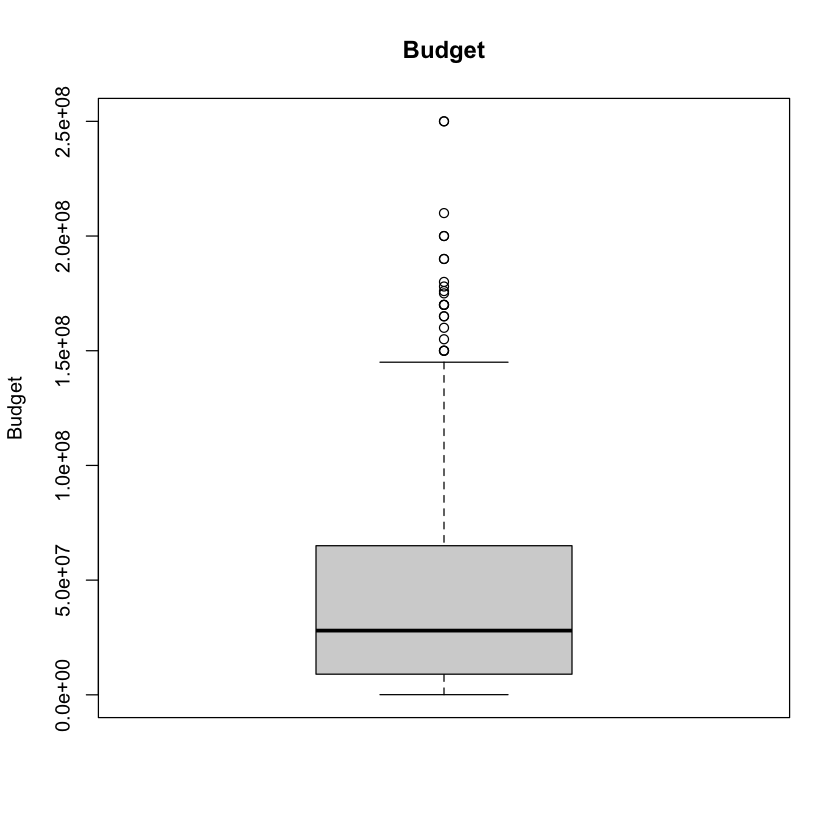

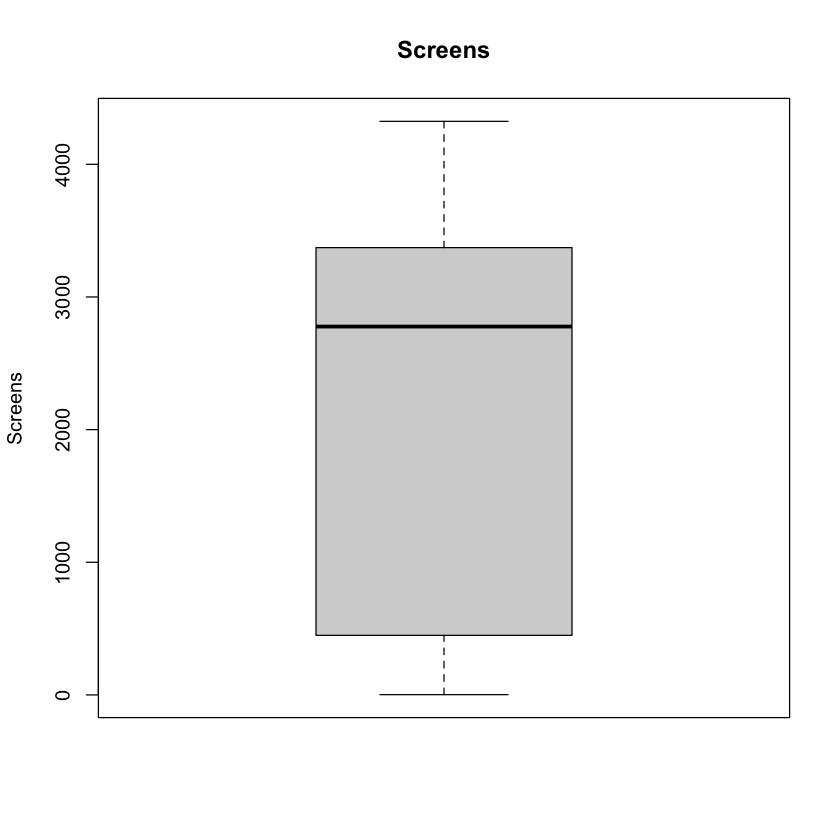

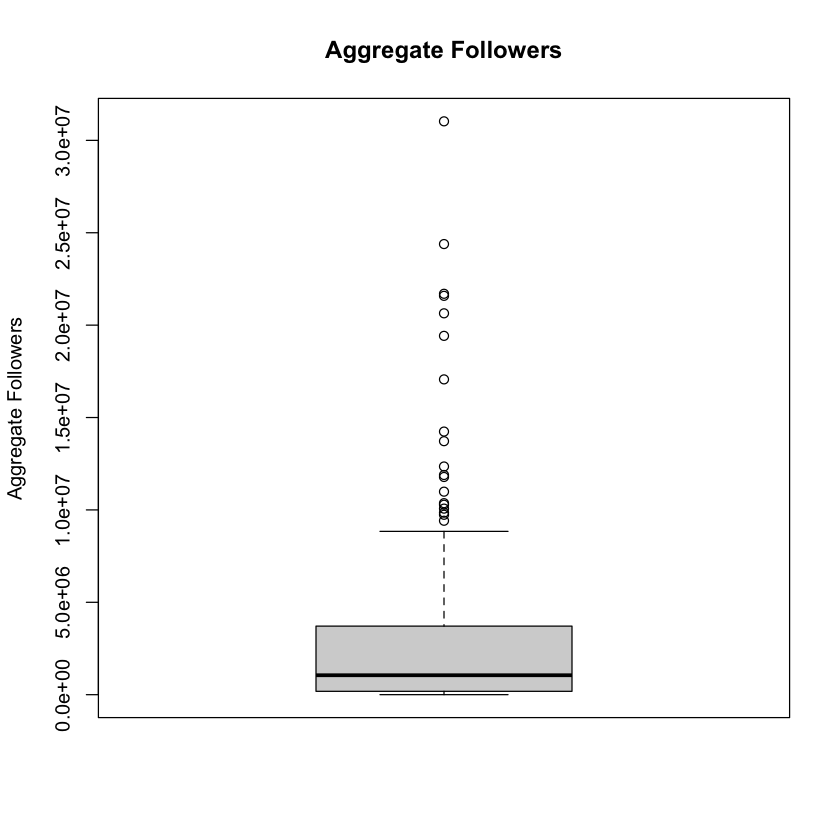

In [14]:
# Vẽ Box Plot
for (col in missing_cols){
    boxplot(df[[col]], main=col, ylab=col)
}

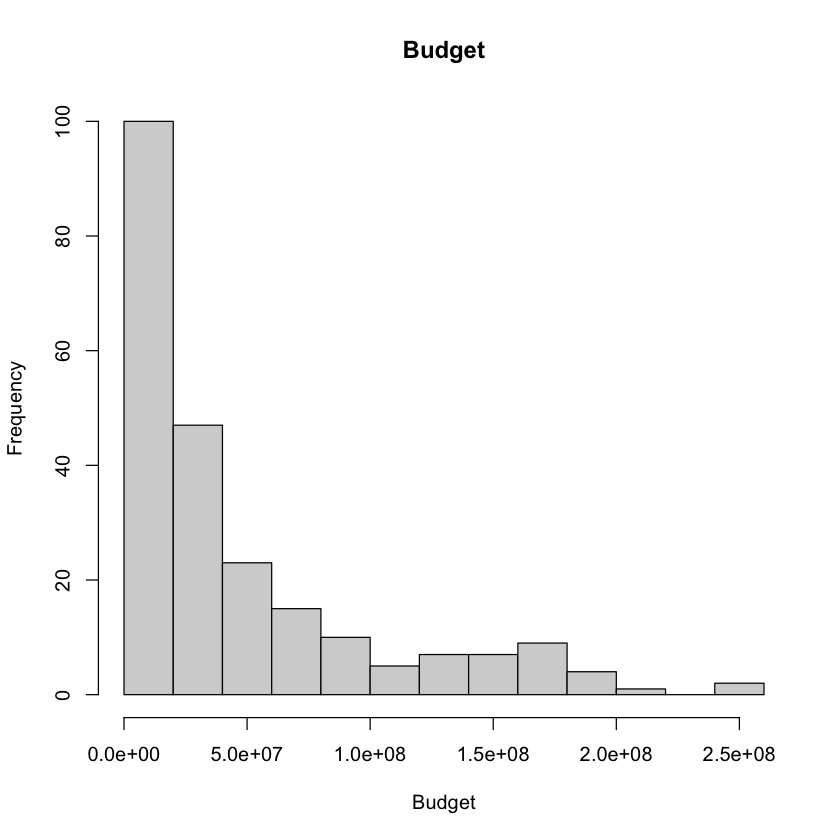

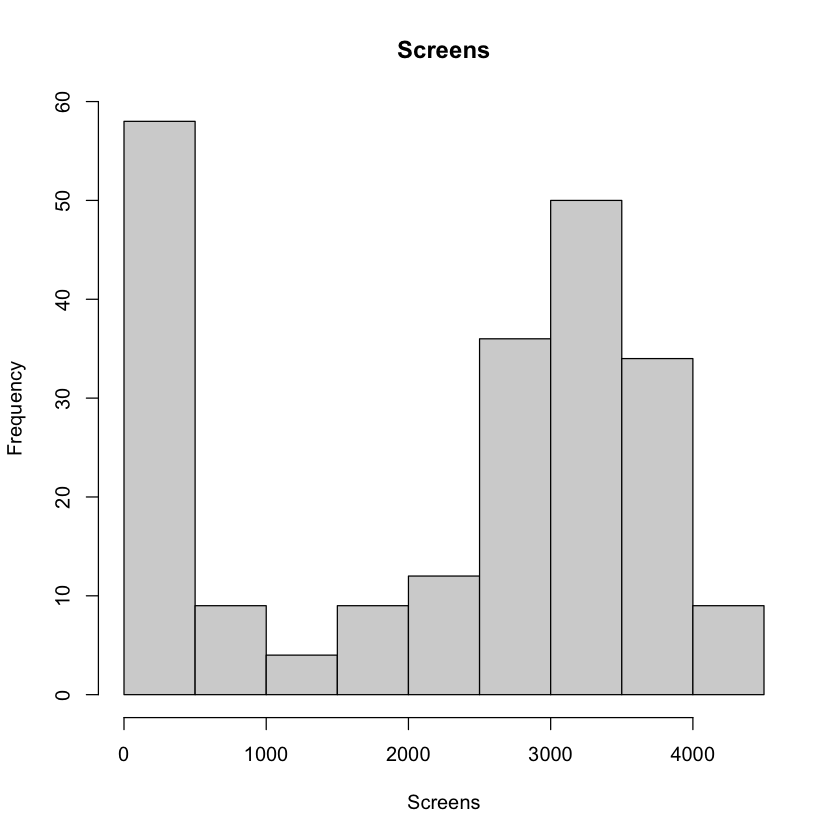

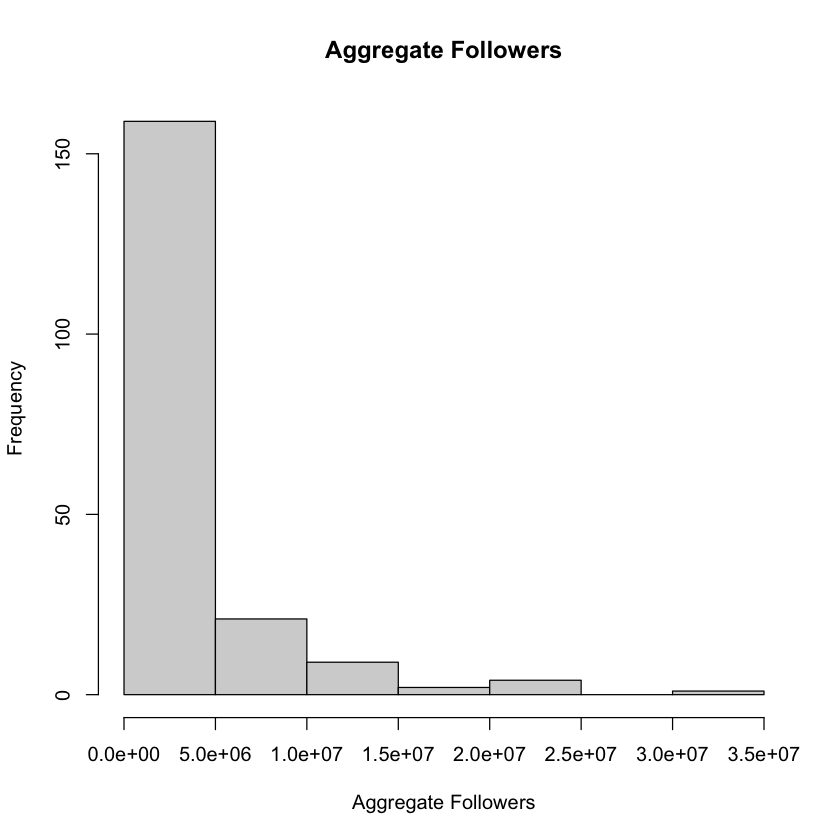

In [15]:
# Vẽ Histogram
for (col in missing_cols){
    hist(df[[col]], breaks=10 ,main=col, xlab=col)
}

- NHẬN XÉT:
Dựa trên các biểu đồ box plot và biểu đồ histogram của 3 biến Budget, Screens và Aggregate Followers ta thấy răng:
   - Biến "Budget": Phân phối bị lệch phải rõ rệt với nhiều giá trị ngoại lệ lớn. Giá trị trung vị thấp hơn nhiều so với giá trị trung bình, cho thấy rằng có nhiều giá trị rất lớn ảnh hưởng đến trung bình.
    - Biến "Screens": Không có nhiều ngoại lệ rõ ràng như biến "Budget", nhưng vẫn có sự phân phối không đối xứng.
    - Biến "Aggregate Followers": Phân phối lệch phải rõ rệt với rất nhiều giá trị ngoại lệ lớn. Phần lớn giá trị tập trung ở mức thấp, với một số ít giá trị rất cao tạo thành các ngoại lệ
- KẾT LUẬN: Đối với cả ba biến "Budget", "Screens", và "Aggregate Followers", giá trị trung vị (Median) là phương pháp tốt nhất để điền vào các giá trị thiếu. Phương pháp này giúp giảm thiểu ảnh hưởng của các giá trị ngoại lệ và phản ánh đúng hơn phân phối tổng thể của dữ liệu. Điều này đặc biệt quan trọng trong các tập dữ liệu có phân phối không đều hoặc có nhiều giá trị ngoại lệ

In [16]:
# Điền giá trị Median vào các ô có dữ liệu bị thiếu
for (col in missing_cols){
    median_value <- median(df[[col]], na.rm = TRUE)
    df[[col]] <- ifelse(is.na(df[[col]]), median_value, df[[col]])

}

In [17]:
# Kiểm tra lại dữ liệu bị thiếu của df:
check_missing_value_function(df, colnames(df))

Du lieu co 0 dong bi thieu, chiem 0%


Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


- Dữ liệu đã được xử lý dữ liệu thiếu

## XỬ LÝ BIẾN LIÊN TỤC

In [18]:
box_plot_function = function(df, list_col = c(""), full_plot = TRUE){
    if (list_col[1] == "") {
        list_col <- names(df)
    }
    for (col in list_col){
        boxplot(df[[col]], col = "skyblue", main = col)
    }
    if (full_plot == TRUE){
        boxplot(df, col = "skyblue", main = "Boxplot")
    }
}

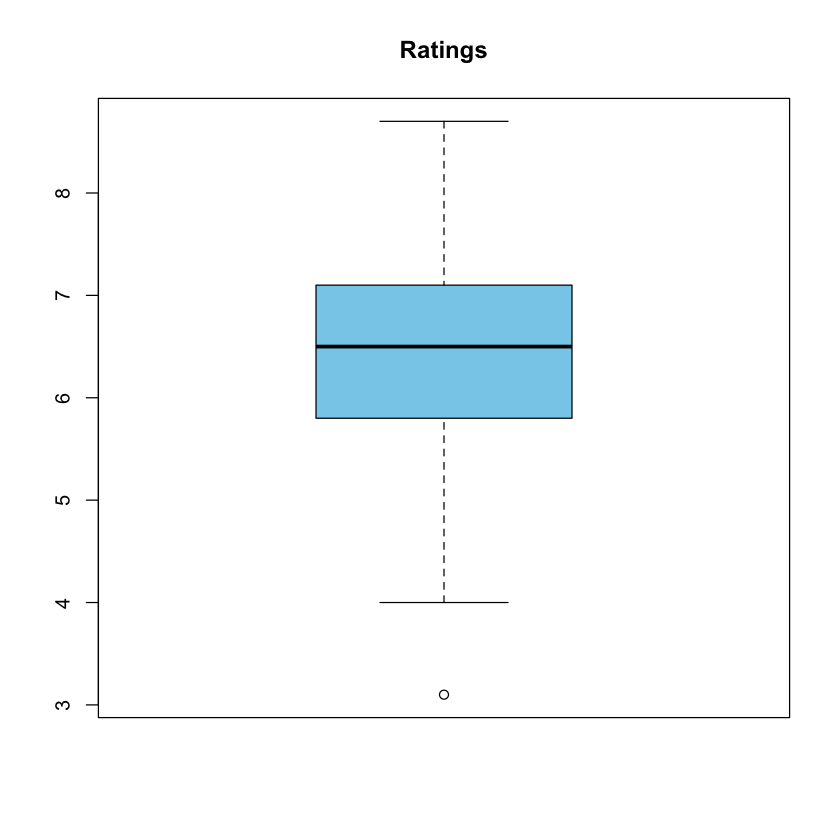

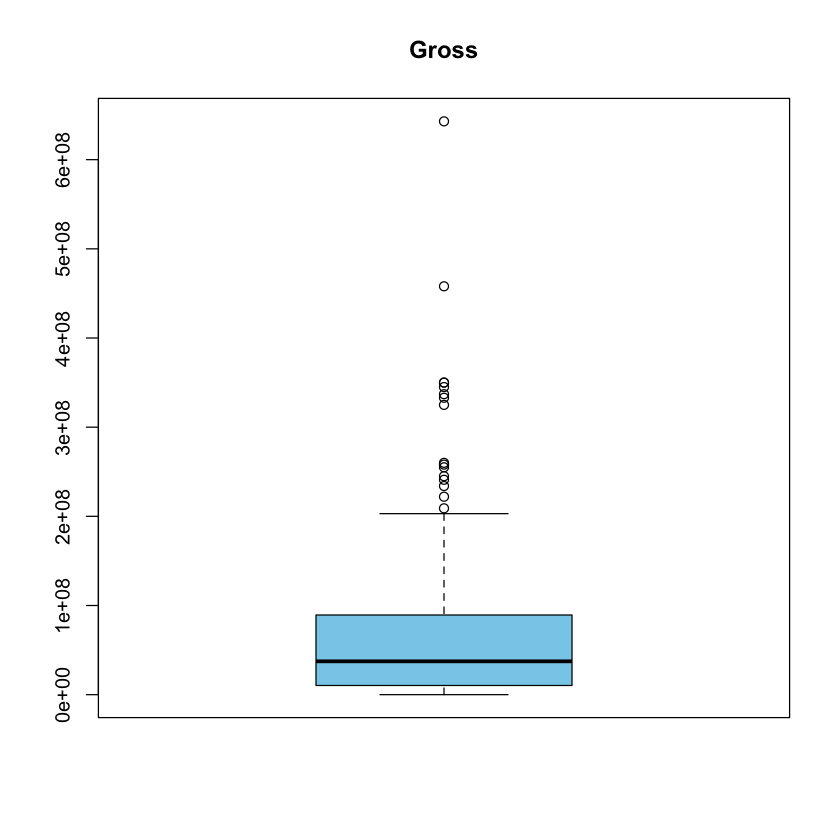

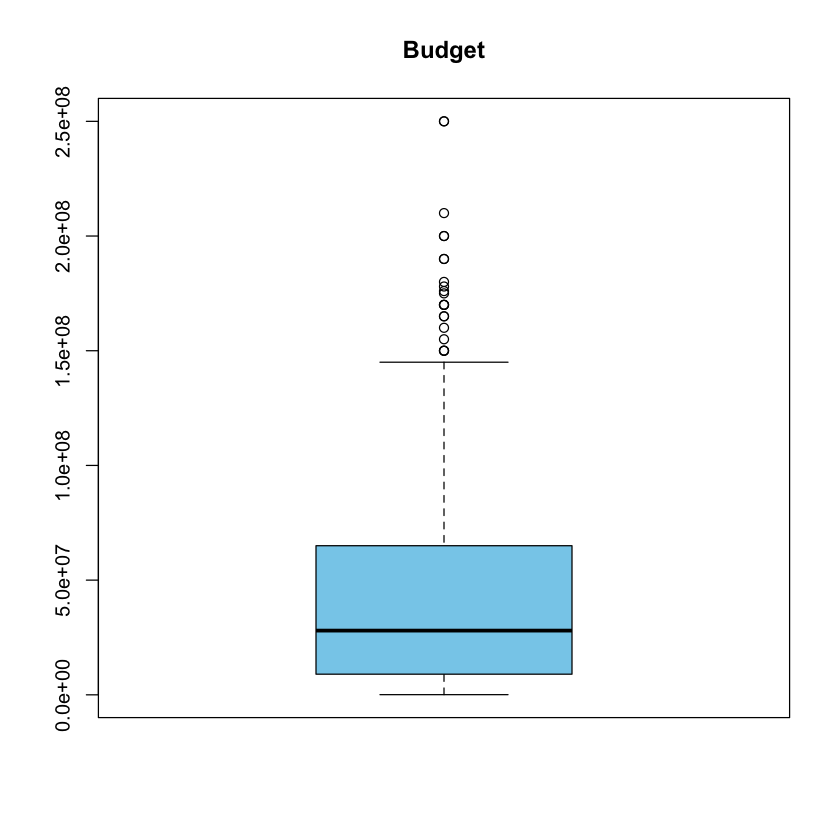

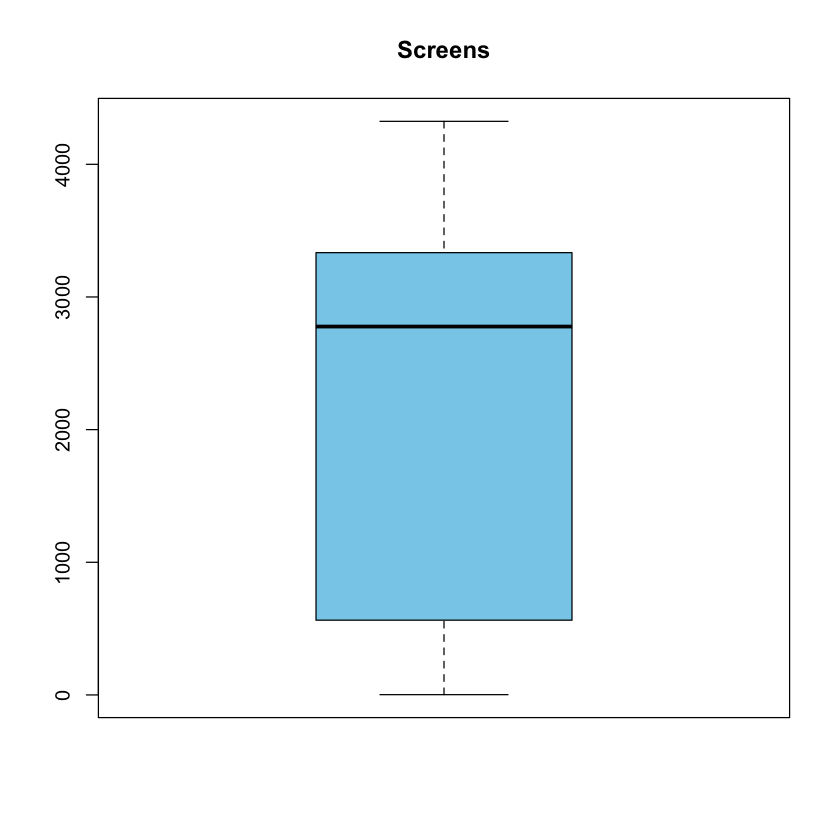

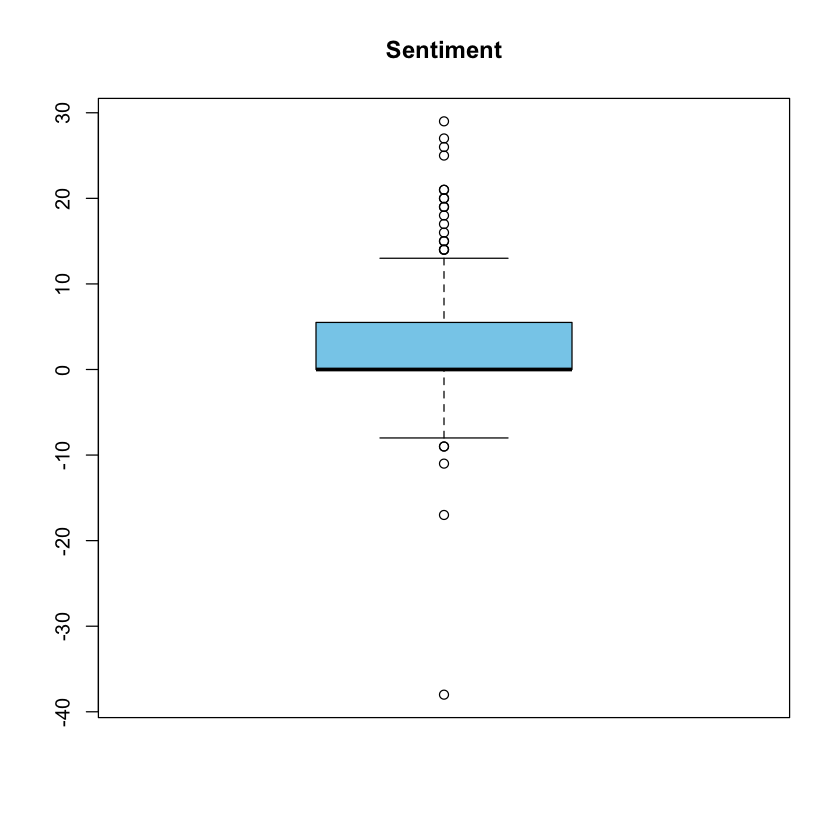

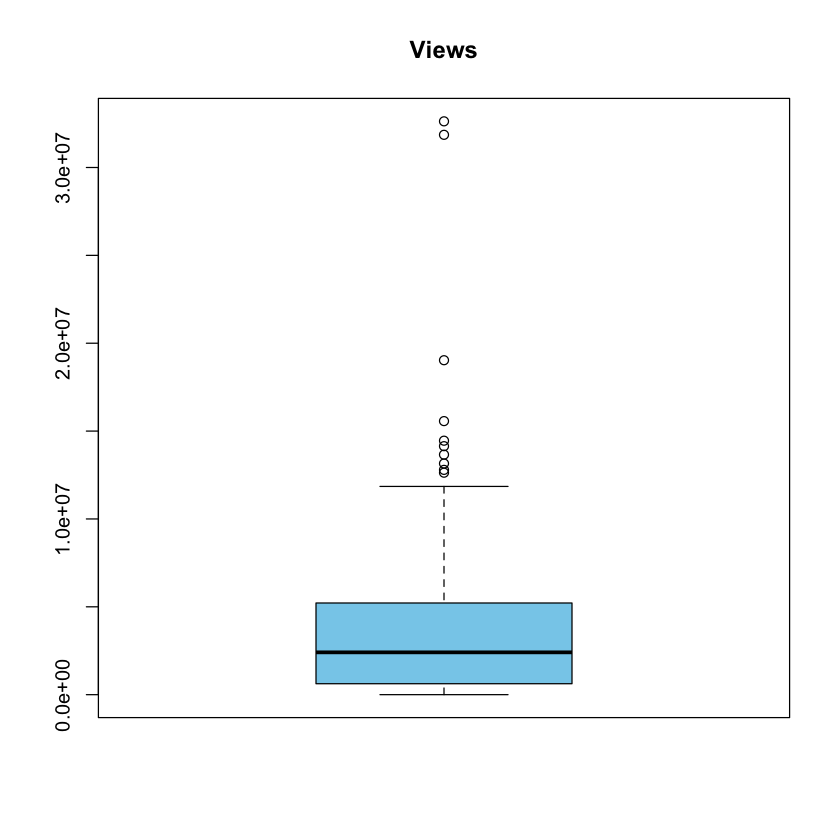

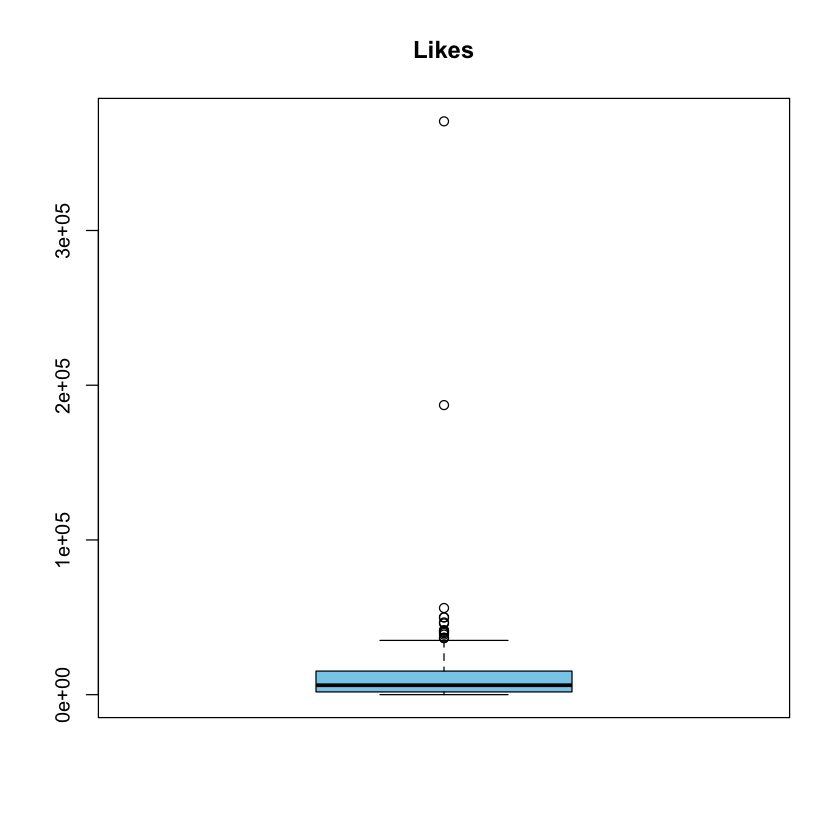

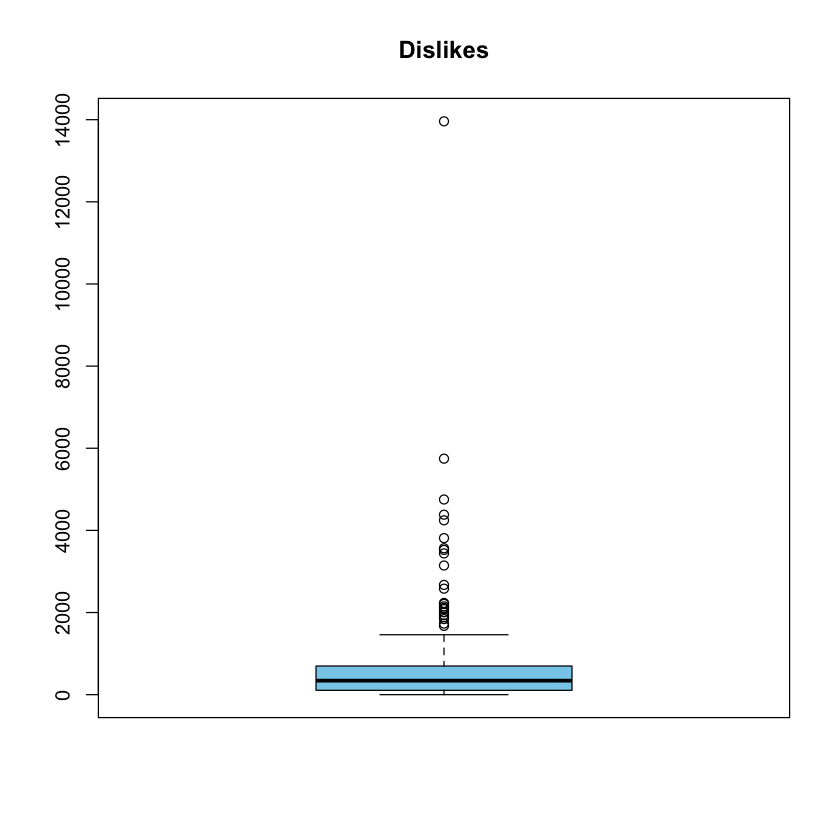

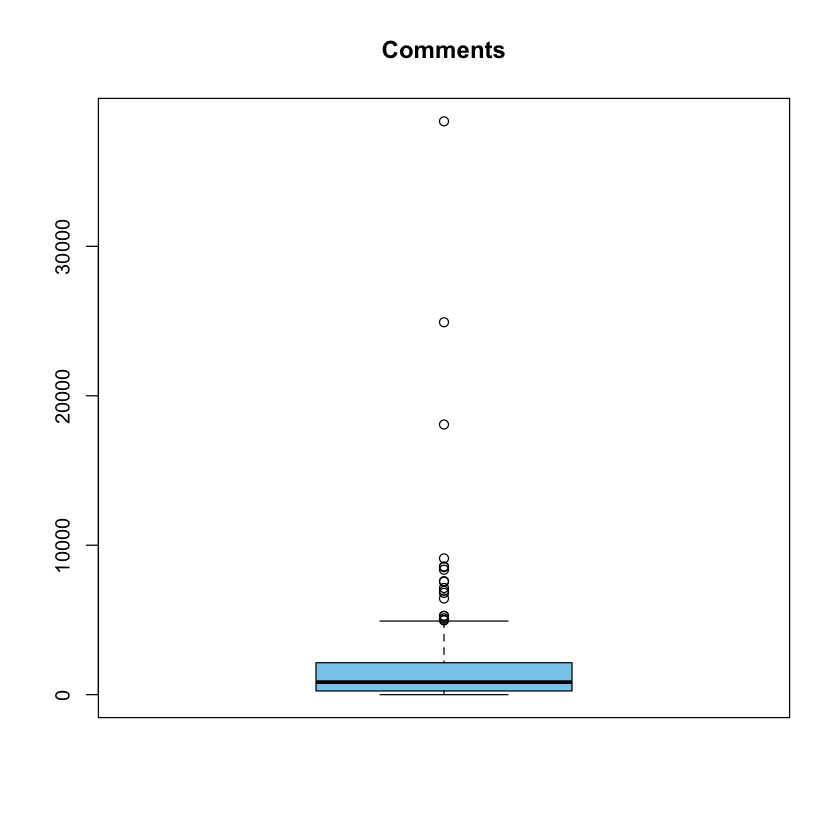

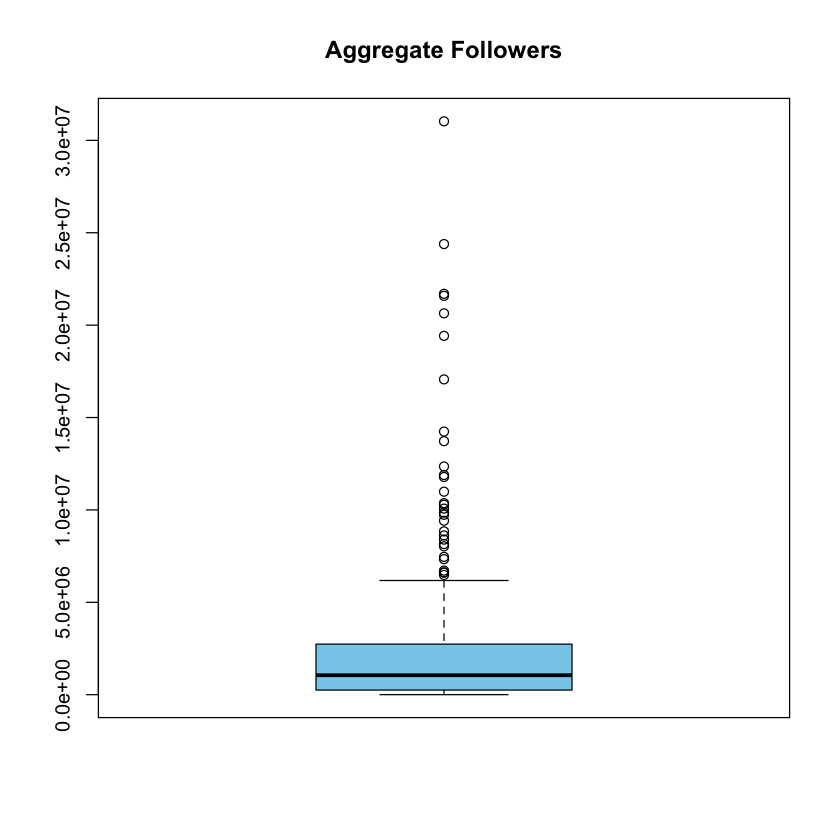

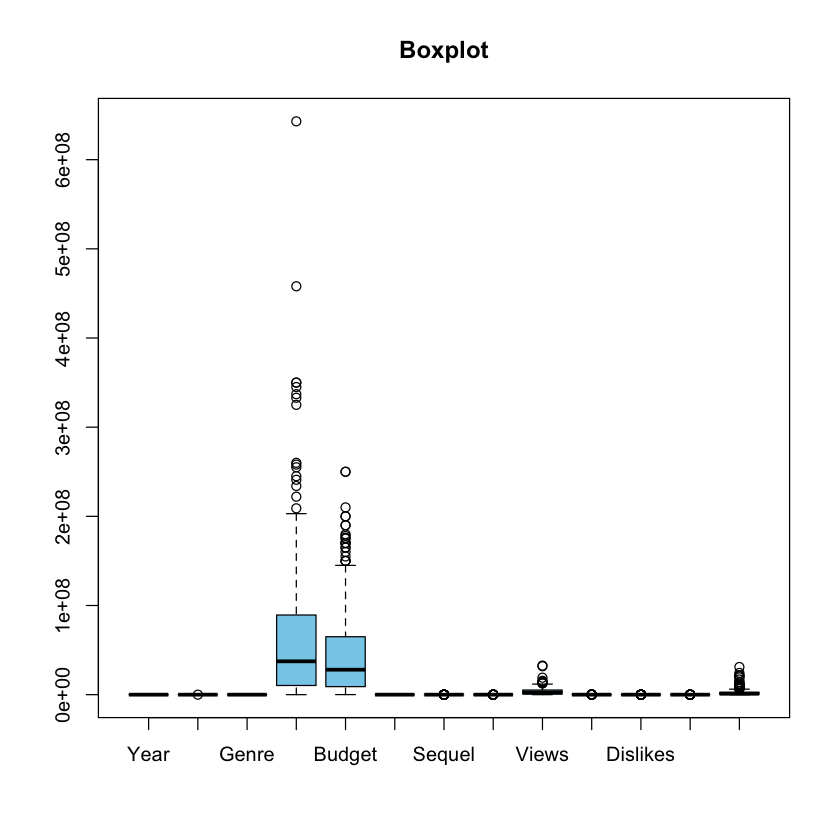

In [19]:
box_plot_function(df, list_col = ltuc_cols)

- Từ các biểu đồ box plot ta thấy rằng, ngoại trừ biến Screens không có dữ liệu ngoại lai, thì hầu hết các biến khác đều tồn tại giá trị ngoại lai
- Có sự không cân bằng giữa giá trị các cột dữ liệu: cột dữ liệu Gross, Budget có khoảng giá trị lớn hơn các biến khác, do đó cần chuẩn hoá dữ liệu cho bộ dữ liệu df này

### CỰC NGOẠI LAI CỦA BIẾN Y

- Đối với biến y (trong bài này là biến Gross) Có một số giá trị ngoại lệ (outliers) nằm rất xa khỏi phần lớn các giá trị khác, đặc biệt là các giá trị trên 3e+08 và cao hơn.  Các giá trị ngoại lệ này có thể đại diện cho các bộ phim có doanh thu cực kỳ cao, có thể do những yếu tố đặc biệt như thương hiệu lớn, dàn diễn viên nổi tiếng, hoặc các chiến dịch quảng bá mạnh mẽ.
- Do các giá trị ngoại lệ này có thể đại diện cho các trường hợp đặc biệt và quan trọng trong phân tích, chúng ta không nên loại bỏ chúng mà nên xem xét phân tích riêng.

- Xác định ngưỡng để xác định ngoại lệ: trên 3 lần độ lệch chuẩn so với trung bình. 

In [20]:
threshold <- mean(df$Gross, na.rm = TRUE) + 3 * sd(df$Gross, na.rm = TRUE)

# Tách các giá trị ngoại lệ
outliers_gross <- df[df$Gross > threshold, ]

# Phần dữ liệu không chứa ngoại lệ của biến Gross
non_outliers_gross <- df[df$Gross <= threshold, ]


In [21]:
# Các dòng có giá trị Gross cao hơn
outliers_gross

Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,7.3,1,3.50e+08,5.88e+07,3555,1,4,3927600,13143,573,3134,24300
2014,6.8,2,3.37e+08,1.25e+08,4151,3,2,3305417,14684,332,1176,31030000
2015,7.3,1,6.43e+08,1.50e+08,4274,4,1,9143740,34746,1074,5107,6180000
2015,7.8,1,4.58e+08,2.50e+08,4276,2,21,10366624,31552,989,3843,10070000
2015,7.4,1,3.50e+08,1.90e+08,4004,7,-17,59056,330,8,39,11890000
2015,8.6,12,3.45e+08,1.75e+08,3946,1,2,1438926,4632,262,496,232000


### XỬ LÝ NGOẠI LAI

- Bộ dữ liệu này không bao gồm 6 dòng chứa cực ngoại lai của biến Gross

In [22]:
check_outlier_function <- function(df, list_col = c("")) {
    if (list_col[1] == "") {
        list_col <- names(df)
    }
    outlier_df <- data.frame()
    for (col in list_col) {
        Q1 <- quantile(df[[col]], 0.25)
        Q3 <- quantile(df[[col]], 0.75)
        IQR <- Q3 - Q1
        outliers <- df[df[[col]] < (Q1 - 1.5 * IQR) | df[[col]] > (Q3 + 1.5 * IQR), ]
        n_out <- nrow(outliers)
        print(paste("So outlier cua cot ", col, ": ", n_out))
        outlier_df <- rbind(outlier_df, outliers)
    }
    print(paste("Tong so outlier cua df: ", nrow(unique(outlier_df))))
    outlier_percent <- nrow(outlier_df) / nrow(df) * 100
    print(glue("Phan tram outlier: {outlier_percent}%"))
    return(outlier_df)
}

In [23]:
outlier_df = check_outlier_function(non_outliers_gross, list_col = ltuc_cols)

[1] "So outlier cua cot  Ratings :  1"
[1] "So outlier cua cot  Gross :  13"
[1] "So outlier cua cot  Budget :  19"
[1] "So outlier cua cot  Screens :  0"
[1] "So outlier cua cot  Sentiment :  14"
[1] "So outlier cua cot  Views :  10"
[1] "So outlier cua cot  Likes :  15"
[1] "So outlier cua cot  Dislikes :  23"
[1] "So outlier cua cot  Comments :  18"
[1] "So outlier cua cot  Aggregate Followers :  27"
[1] "Tong so outlier cua df:  79"
Phan tram outlier: 62.2222222222222%


In [24]:
# Xem một số giá trị ngoại lai
head(outlier_df)

Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,3.1,1,1.40e+07,1.60e+07,1825,1,0,5611593,11187,2111,7595,116800
2014,7.9,12,2.22e+08,1.65e+08,3761,1,29,4700023,14163,538,1293,199800
2014,7.8,1,2.60e+08,1.70e+08,3938,2,5,760262,2918,66,837,8030000
2014,7.7,1,2.09e+08,1.70e+08,3967,2,-4,1735700,6772,187,889,114000
2014,6.5,1,2.01e+08,1.60e+08,3952,1,2,1156609,2968,112,547,1870000
2014,8.1,1,3.33e+08,1.70e+08,4080,1,0,1313548,8567,269,1285,2750000


- Bộ dữ liệu có 79 dòng có outlier, chiếm 62%. Do đó ta cần xử lý những ngoại lệ này trước khi đi vào áp dụng mô hình

In [25]:
list_X_ltuc = setdiff(ltuc_cols, c("Gross"))

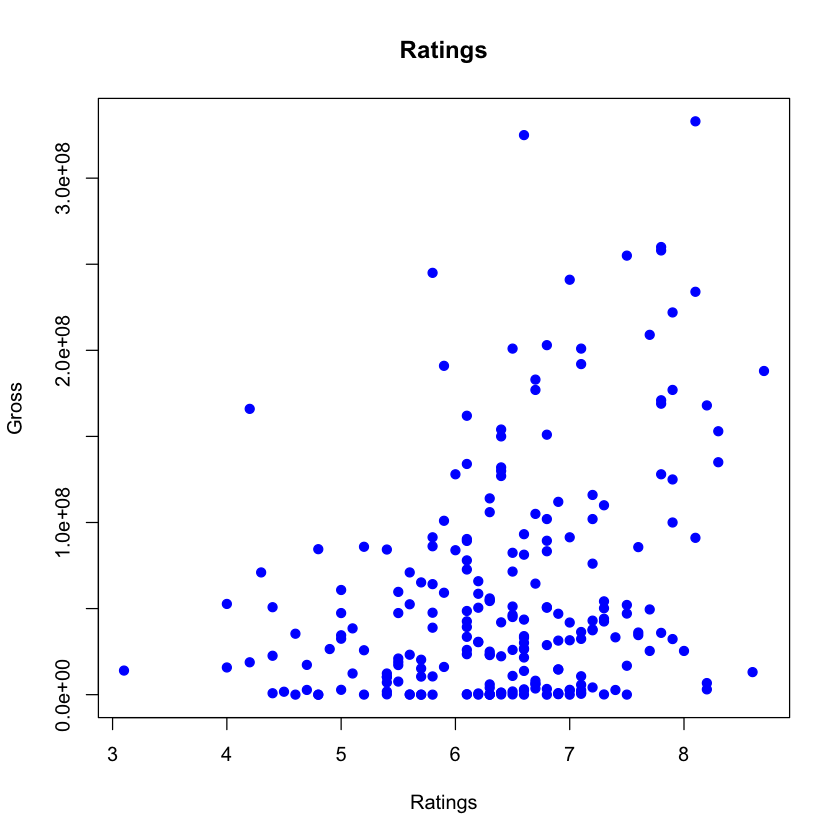

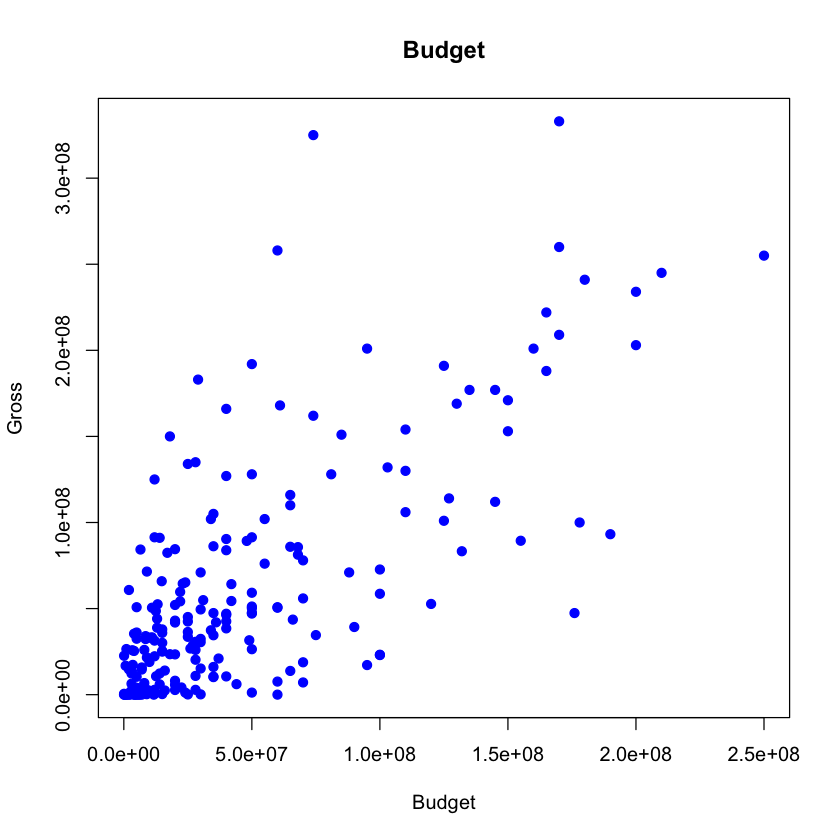

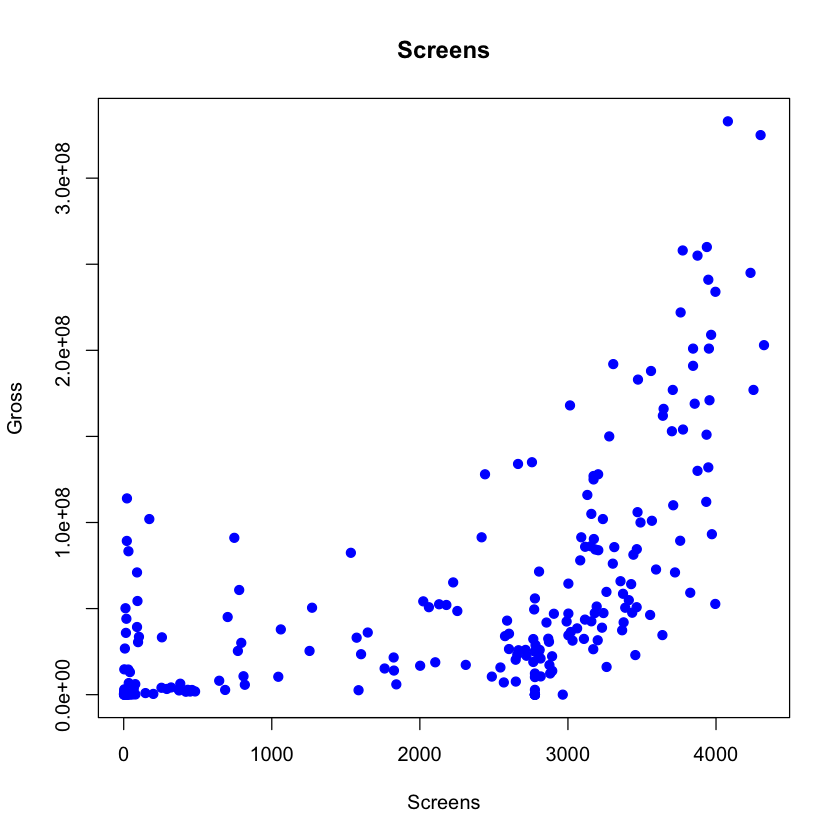

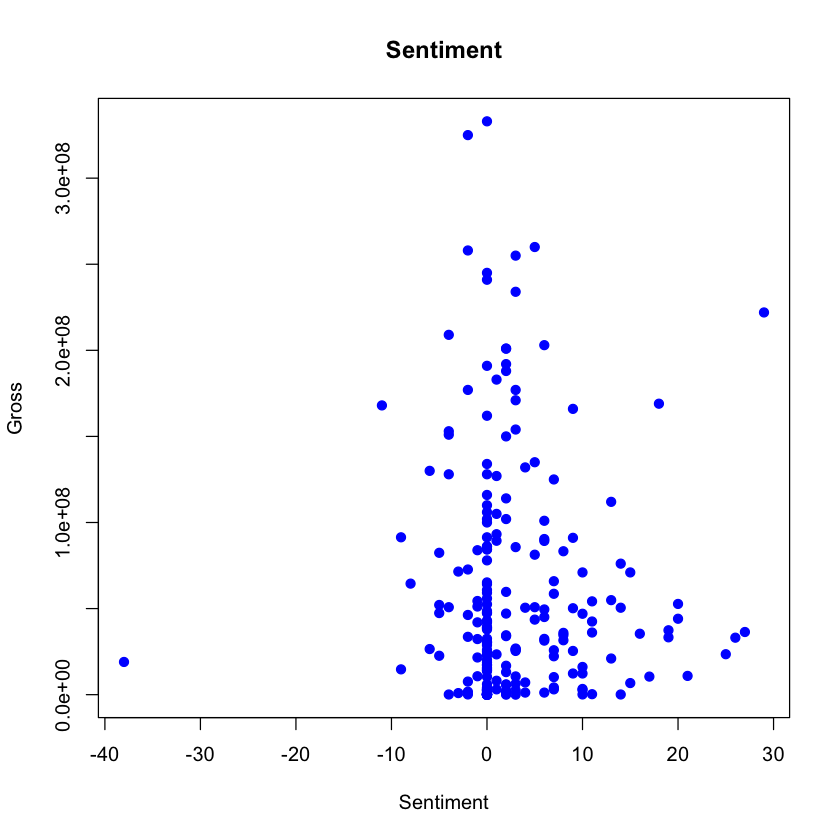

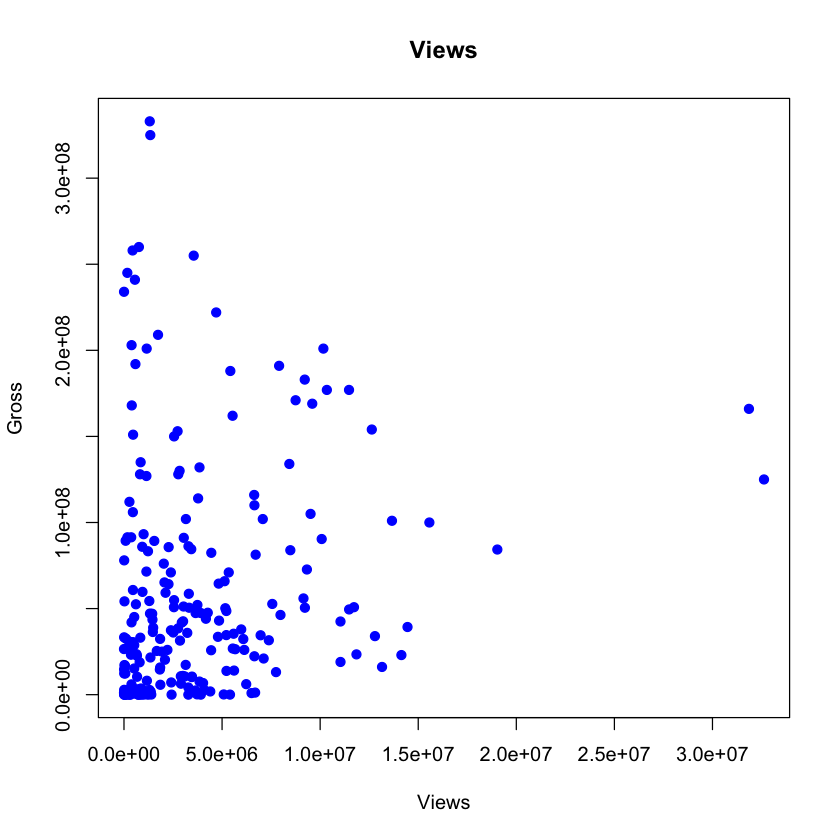

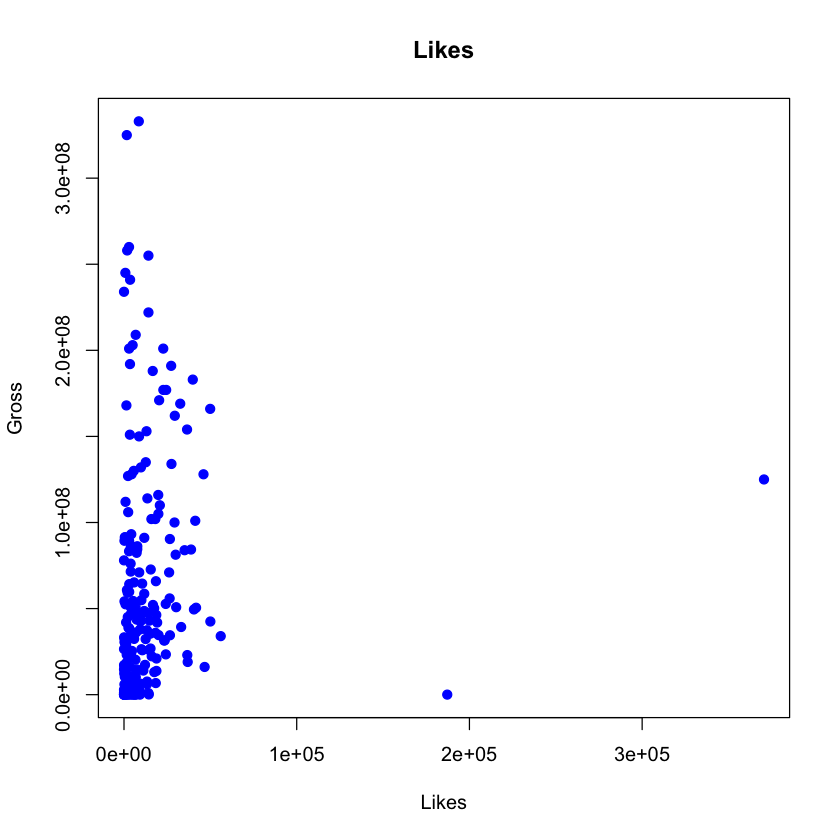

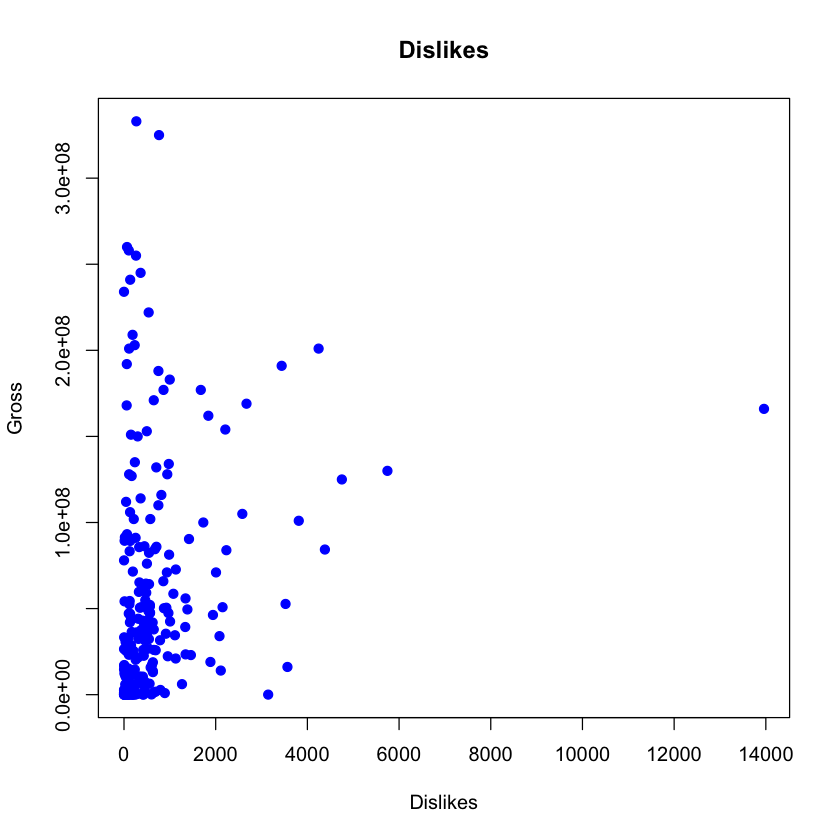

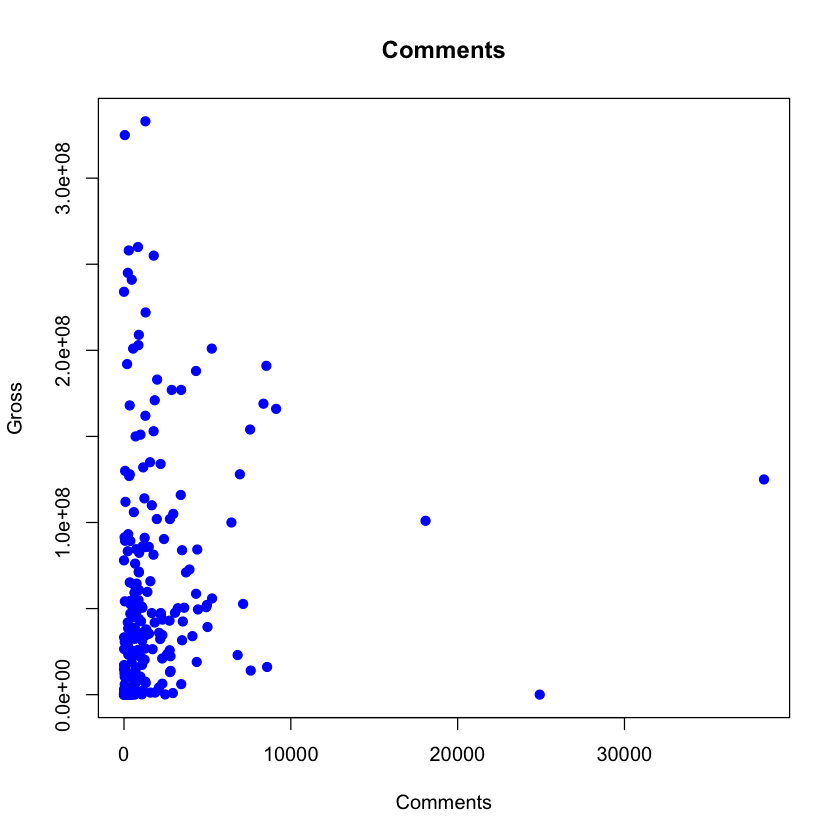

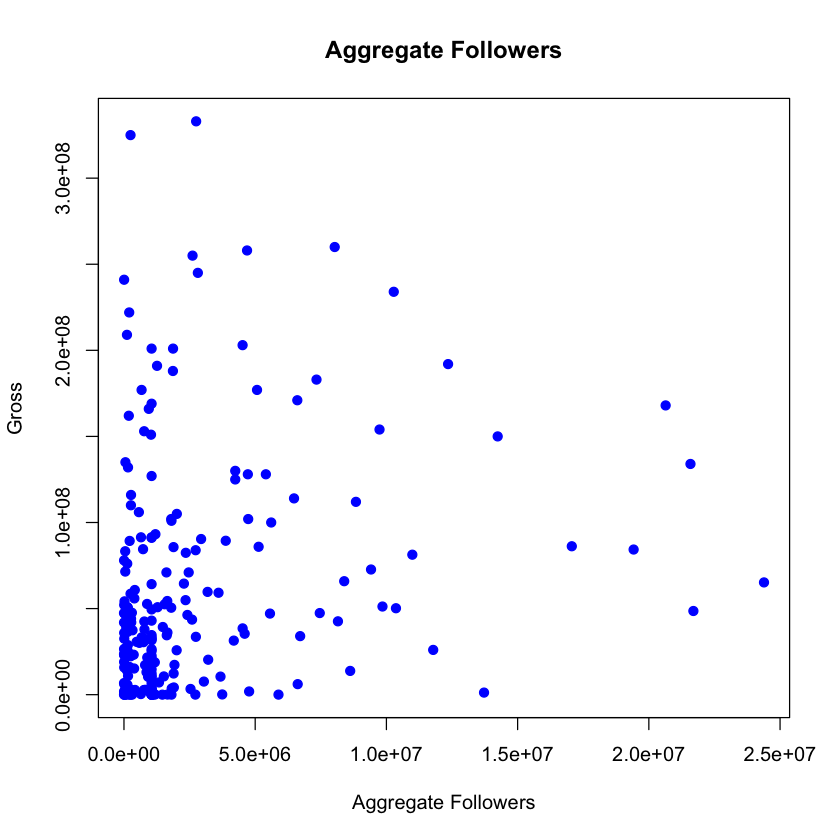

In [26]:
# Vẽ scatter plotcho từ biến liên tục và biến Gross để xác định ngoại lai
for (col in list_X_ltuc){
    plot(non_outliers_gross[[col]], non_outliers_gross$Gross, main=col, xlab=col, ylab="Gross", pch=19, col="blue")
}


- Từ các biểu đồ Scatter plot của các biến liên tục X và biến Gross Y, ta nhận thấy rằng khi chọn 3 lần độ lệch chuẩn (có 6 dòng ngoại lai) thì vẫn còn tồn tại 2 giá trị gây ra các ngoại lai cho các dữ liệu, Do đó ta quyết định chọn mốc 2.8 lần độ lệch chuẩn (sẽ lấy được 8 dòng ngoại lai).

In [27]:
threshold <- mean(df$Gross, na.rm = TRUE) + 2.8 * sd(df$Gross, na.rm = TRUE)

# Tách các giá trị ngoại lệ
outliers_gross <- df[df$Gross > threshold, ]

# Phần dữ liệu không chứa ngoại lệ của biến Gross
non_outliers_gross <- df[df$Gross <= threshold, ]


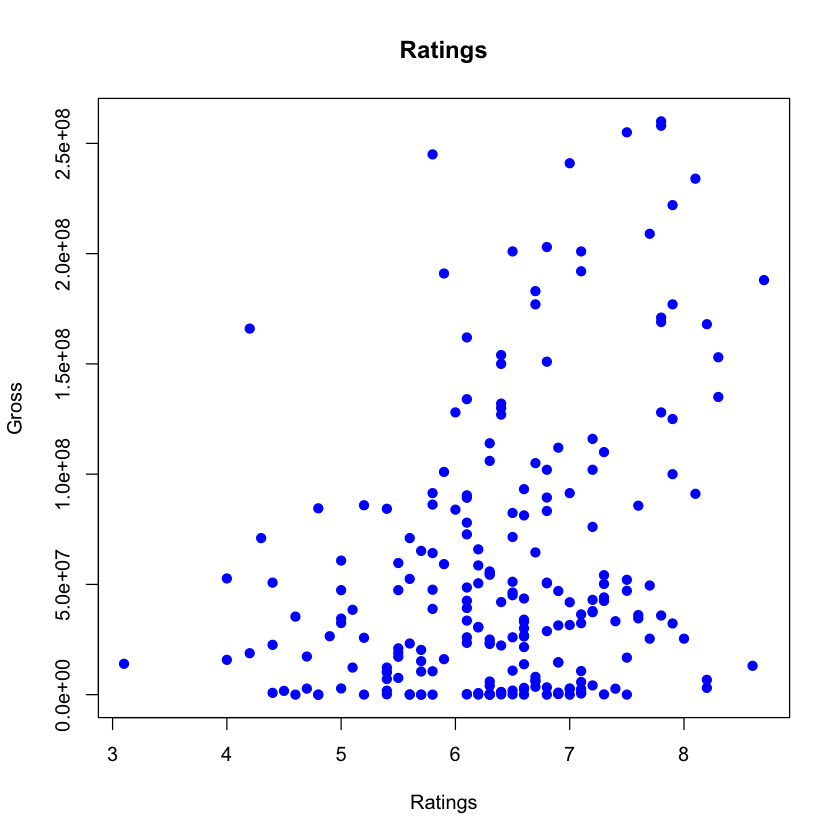

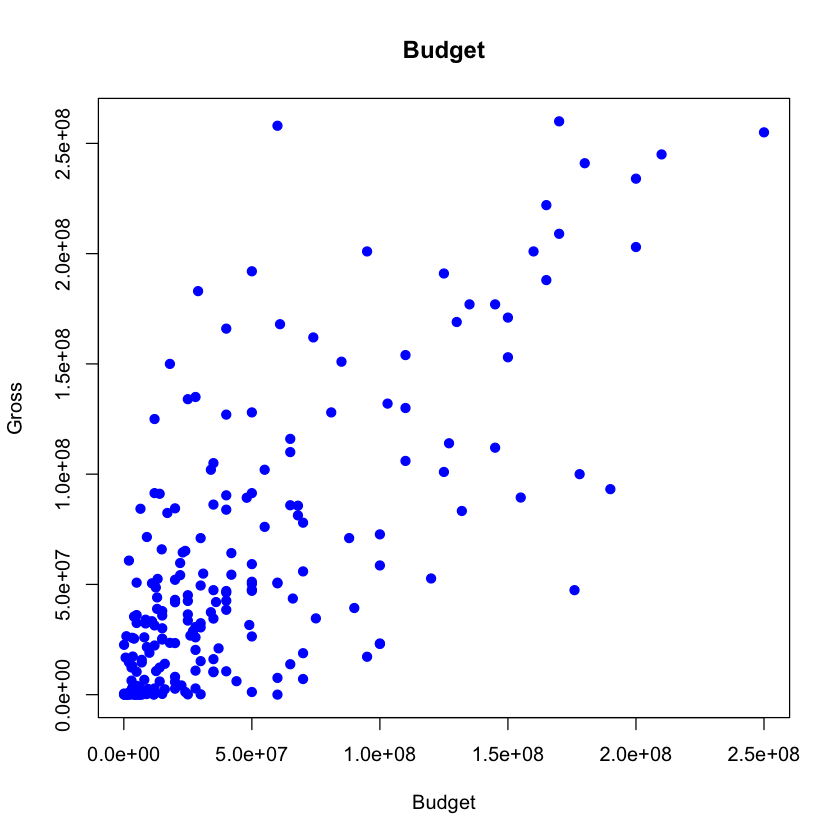

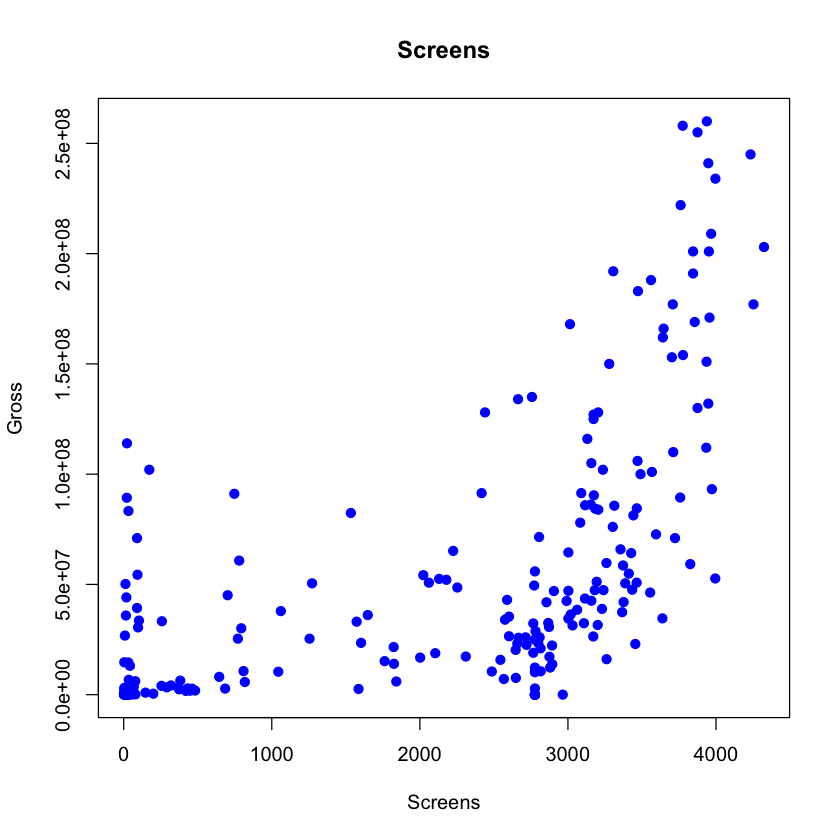

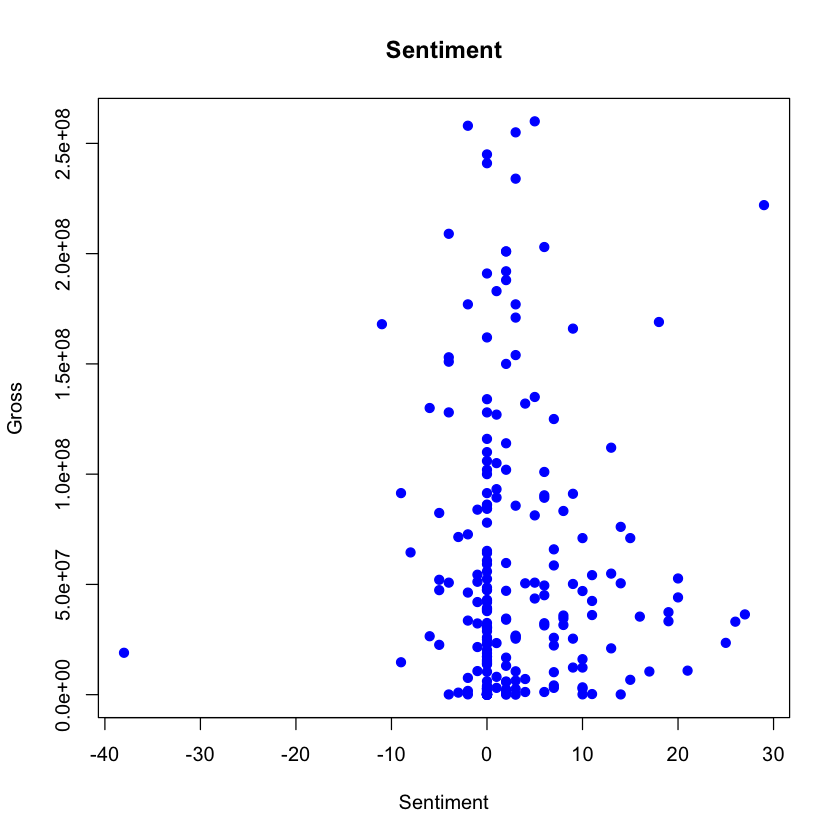

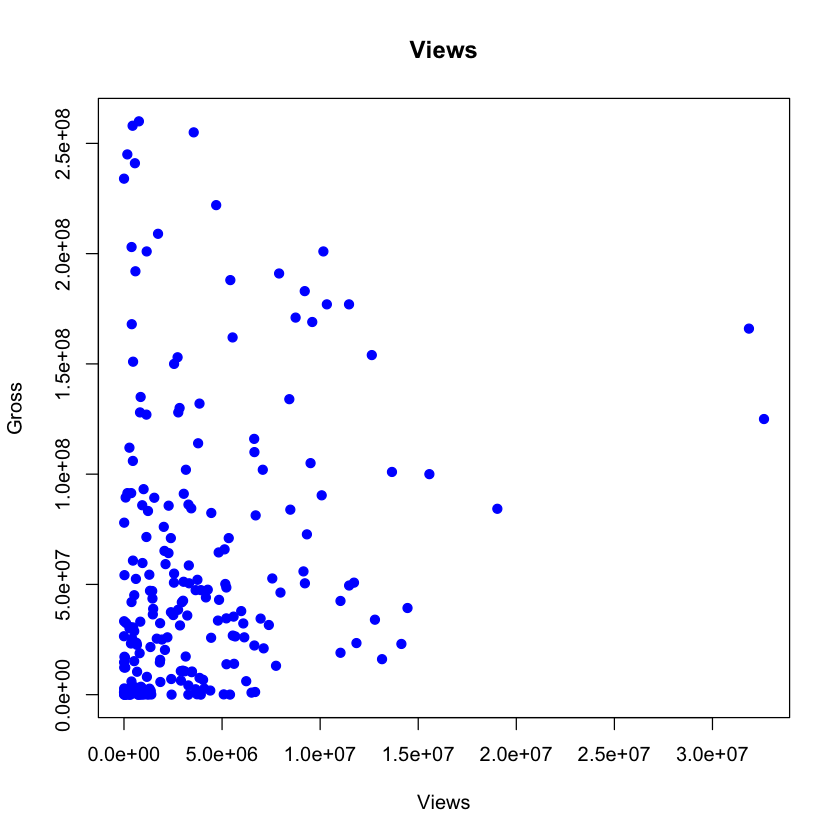

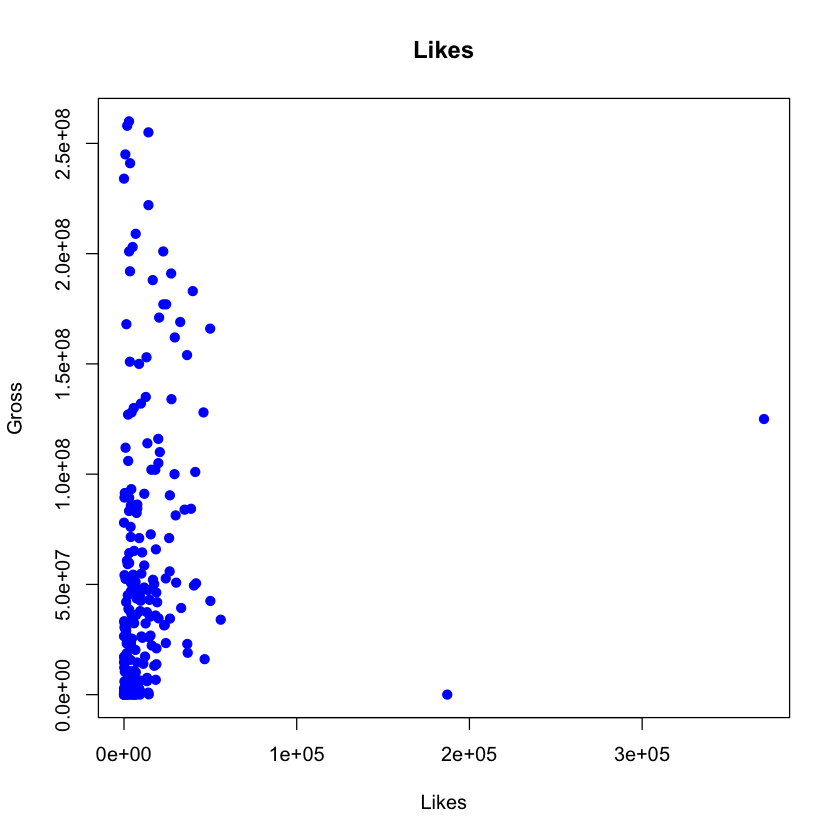

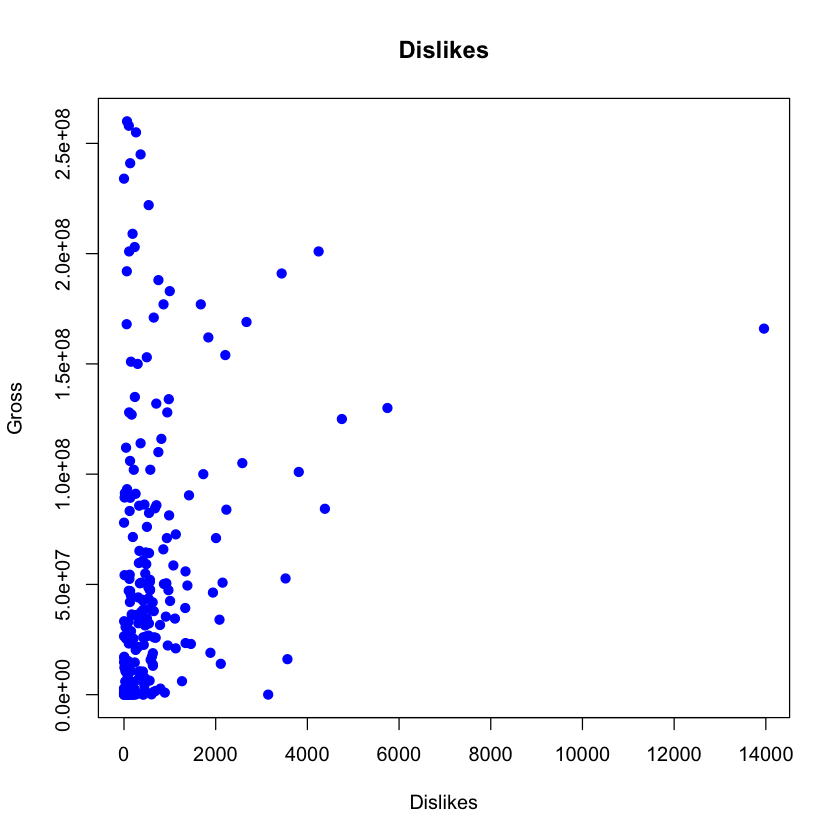

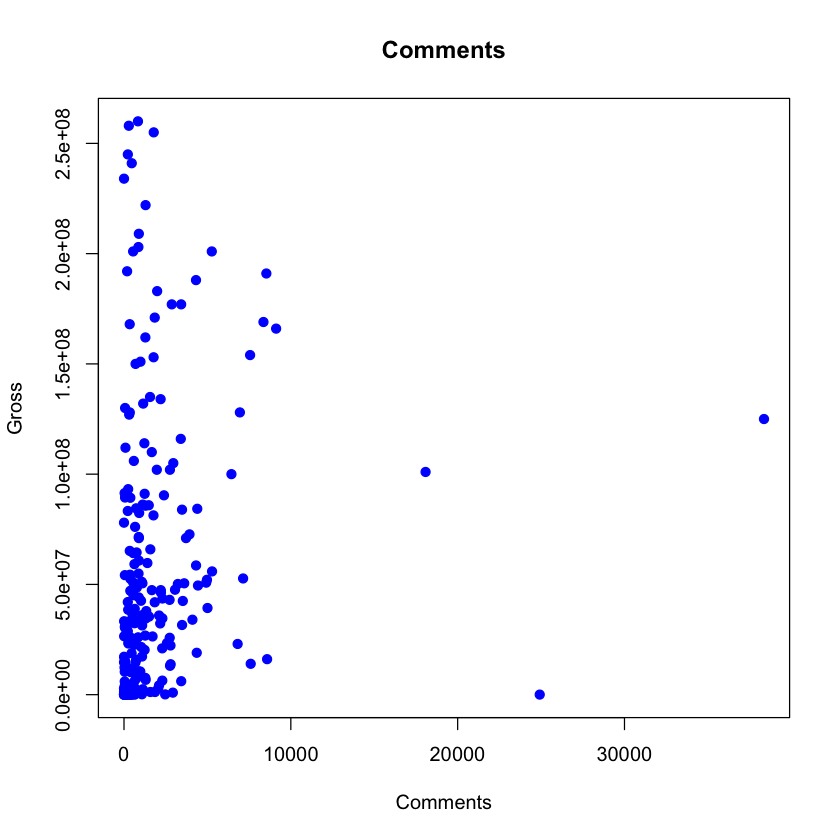

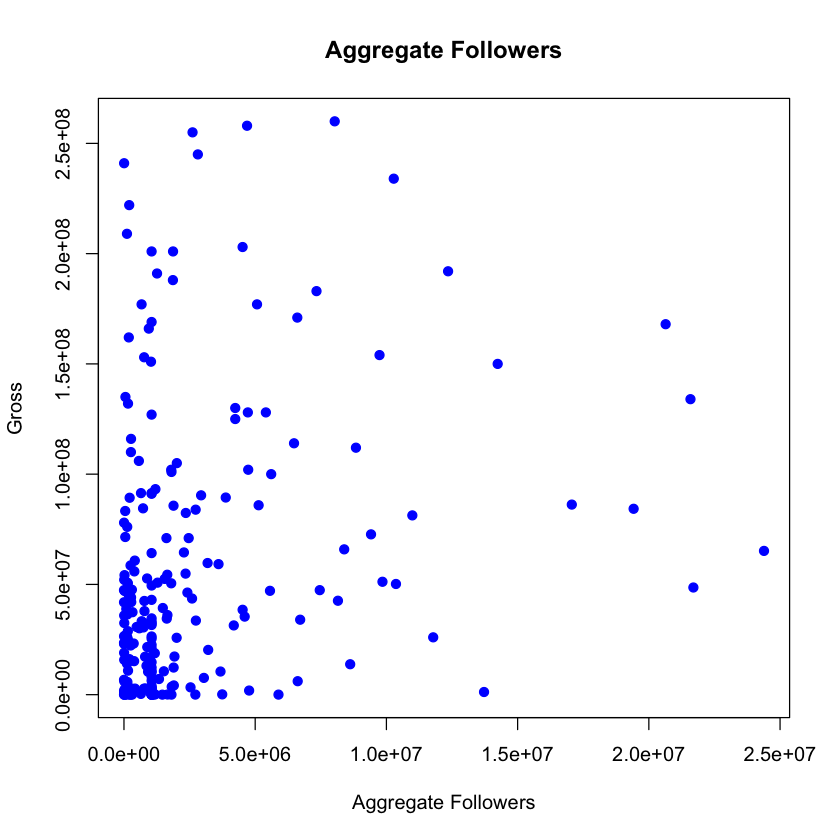

In [28]:
# Vẽ scatter plotcho từ biến liên tục và biến Gross để xác định ngoại lai
for (col in list_X_ltuc){
    plot(non_outliers_gross[[col]], non_outliers_gross$Gross, main=col, xlab=col, ylab="Gross", pch=19, col="blue")
}


### LOẠI BỎ NGOẠI LAI

- Từ các đồ thị scatter plot ở trên ta có thể dễ dàng loại bỏ ngoại lai là những điểm dữ liệu nằm tách rời hoàn toàn so với những cụm dữ liệu khác, cụ thể là:
    - Biến Ratings: Loại 2 điểm dữ liệu: 1. Điểm dữ liệu có rating bé hơn 3.5, 2. Điểm dữ liệu có Ratings bé hơn 5 và Gross lớn hơn 1.5e+08
    - Biến Sentimet: Loại 2 điểm dữ liệu: 1. Điểm dữ liệu có Sentiment nhỏ hơn -30, 2. Điểm dữ liệu có Sentinment lớn hơn 20 và có Gross lớn hơn 2.0e+08.
    - Đối với biến Views: Loại 2 điểm dữ liệu có Views lớn hơn 2.5e+07
    - Đối với biến like: loại bỏ 2 điểm dữ liệu có Likes lớn hơn 1e+05
    - Đối với biến Dislikes: loại bỏ 1 điểm dữ liệu có Dislikes lớn hơn 12000
    - Comments: Loại 3 điểm dữ liệu có Coments lớn hơn 15000
    

In [29]:
# Các dòng ngoại lai được loại bỏ:
non_outliers_gross[(non_outliers_gross$Ratings < 3.5 |
                          (non_outliers_gross$Ratings < 5 & non_outliers_gross$Gross > 1.5e+08) |
                          non_outliers_gross$Sentiment < -30 |
                          (non_outliers_gross$Sentiment > 20 & non_outliers_gross$Gross > 2.0e+08) |
                          non_outliers_gross$Views > 2.5e+07 |
                          non_outliers_gross$Likes > 1e+05 |
                          non_outliers_gross$Dislikes > 12000 |
                          non_outliers_gross$Comments > 15000), ]

Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,7.9,12,2.22e+08,1.65e+08,3761,1,29,4700023,14163,538,1293,199800
2014,3.1,1,1.40e+07,1.60e+07,1825,1,0,5611593,11187,2111,7595,116800
2014,5.9,1,1.01e+08,1.25e+08,3567,1,6,13661095,41254,3812,18077,1810000
2014,5.2,8,3.57e+04,6.00e+05,2777,1,0,5403836,187162,3145,24919,2720000
2014,7.9,3,1.25e+08,1.20e+07,3173,1,7,32626778,370552,4752,38363,4240000
2015,4.2,3,1.66e+08,4.00e+07,3646,1,9,31859569,49900,13960,9119,946000
2015,5.5,1,1.90e+07,1.00e+07,2766,2,-38,11037833,36874,1885,4360,5699


In [30]:
dim(non_outliers_gross)

[1] 223  13

- Sẽ loại tổng cộng 7 trên tổng số 223 dòng dữ liệu (chiếm 3.1%)

In [31]:
# df_new sau khi đã loại bỏ outlier:
df_new <- non_outliers_gross[!(non_outliers_gross$Ratings < 3.5 |
                          (non_outliers_gross$Ratings < 5 & non_outliers_gross$Gross > 1.5e+08) |
                          non_outliers_gross$Sentiment < -30 |
                          (non_outliers_gross$Sentiment > 20 & non_outliers_gross$Gross > 2.0e+08) |
                          non_outliers_gross$Views > 2.5e+07 |
                          non_outliers_gross$Likes > 1e+05 |
                          non_outliers_gross$Dislikes > 12000 |
                          non_outliers_gross$Comments > 15000), ]



### KIỂM TRA SỰ TƯƠNG QUAN CỦA DỮ LIỆU

In [32]:
# Ma trận tương quan R
R = cor(df_new[ltuc_cols])
R

,Ratings,Gross,Budget,Screens,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
Ratings,1.000000000,0.3059376,0.21915591,-0.004246286,0.12149884,0.06929359,0.1226217,-0.10427487,0.09660184,0.02686005
Gross,0.305937592,1.0000000,0.73862970,0.589390509,-0.09814060,0.17311704,0.2301731,0.24996861,0.23640508,0.29163323
Budget,0.219155911,0.7386297,1.00000000,0.551583072,-0.02858589,0.16322888,0.1602098,0.20479528,0.27329803,0.13253253
Screens,-0.004246286,0.5893905,0.55158307,1.000000000,-0.03335617,0.24352855,0.2746842,0.31976839,0.27434080,0.18771379
Sentiment,0.121498839,-0.0981406,-0.02858589,-0.033356170,1.00000000,0.04752684,0.1051320,0.01733195,0.08807504,-0.11404626
Views,0.069293594,0.1731170,0.16322888,0.243528549,0.04752684,1.00000000,0.8751887,0.71846157,0.79591591,0.23016346
Likes,0.122621666,0.2301731,0.16020983,0.274684179,0.10513202,0.87518872,1.0000000,0.66516414,0.81912707,0.19504416
Dislikes,-0.104274869,0.2499686,0.20479528,0.319768395,0.01733195,0.71846157,0.6651641,1.00000000,0.71243703,0.15562981
Comments,0.096601835,0.2364051,0.27329803,0.274340798,0.08807504,0.79591591,0.8191271,0.71243703,1.00000000,0.09001030
Aggregate Followers,0.026860049,0.2916332,0.13253253,0.187713792,-0.11404626,0.23016346,0.1950442,0.15562981,0.09001030,1.00000000


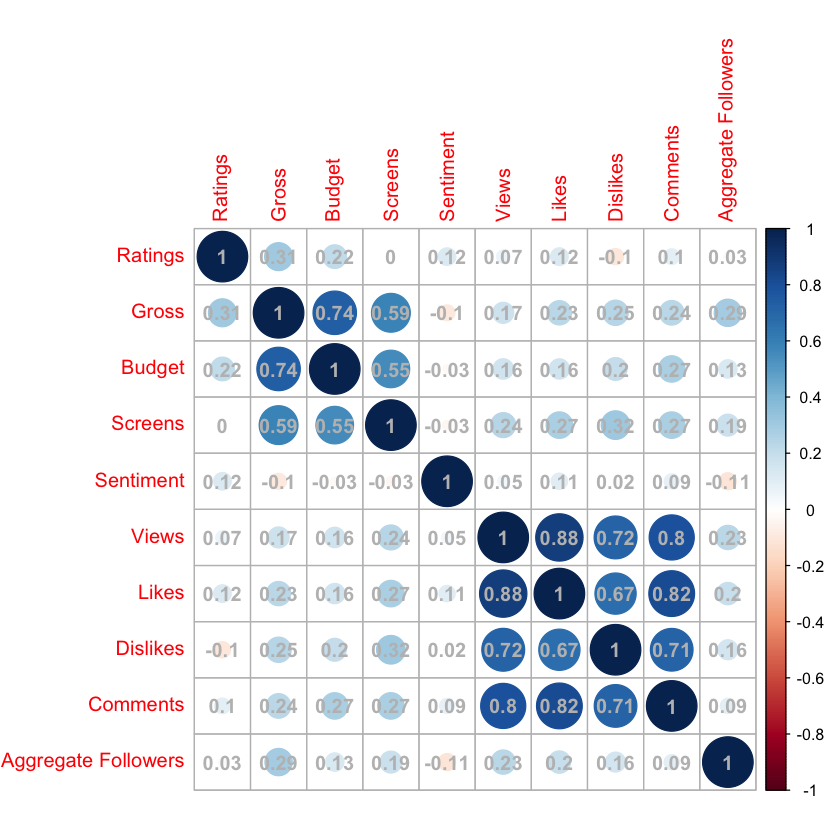

In [33]:
corrplot::corrplot(cor(df_new[ltuc_cols]), addCoef.col = "grey")

- Gross và Budget: Có mối tương quan mạnh (0.74), cho thấy rằng phim có ngân sách cao hơn thường có doanh thu cao hơn.
- Gross và Screens: Có mối tương quan vừa phải (0.59), cho thấy rằng phim chiếu trên nhiều rạp hơn thường có doanh thu cao hơn.
- Budget và Screens: Tương quan khá mạnh (0.55), cho thấy rằng phim có ngân sách cao hơn thường được chiếu trên nhiều rạp hơn.
- Views, Likes, Comments, và Aggregate Followers: Có mối tương quan rất mạnh (trên 0.8), cho thấy rằng khi lượng views tăng, số lượng likes, comments, và followers cũng tăng.
- Likes và Comments: Tương quan rất mạnh (0.82), cho thấy rằng khi số lượng likes tăng, số lượng comments cũng tăng.
- Likes và Dislikes: Tương quan mạnh (0.72), cho thấy rằng khi số lượng likes tăng, số lượng dislikes cũng tăng, mặc dù ở mức độ thấp hơn.
- Ratings: Không có mối tương quan đáng kể với các biến khác, cho thấy rằng đánh giá (rating) không ảnh hưởng nhiều đến các biến khác trong tập dữ liệu này.
- Sentiment: Có mối tương quan yếu với các biến khác, cho thấy rằng chỉ số cảm xúc không liên quan mạnh đến các biến tài chính hoặc mạng xã hội trong tập dữ liệu này.

## PHÂN TÍCH BIẾN PHÂN LOẠI

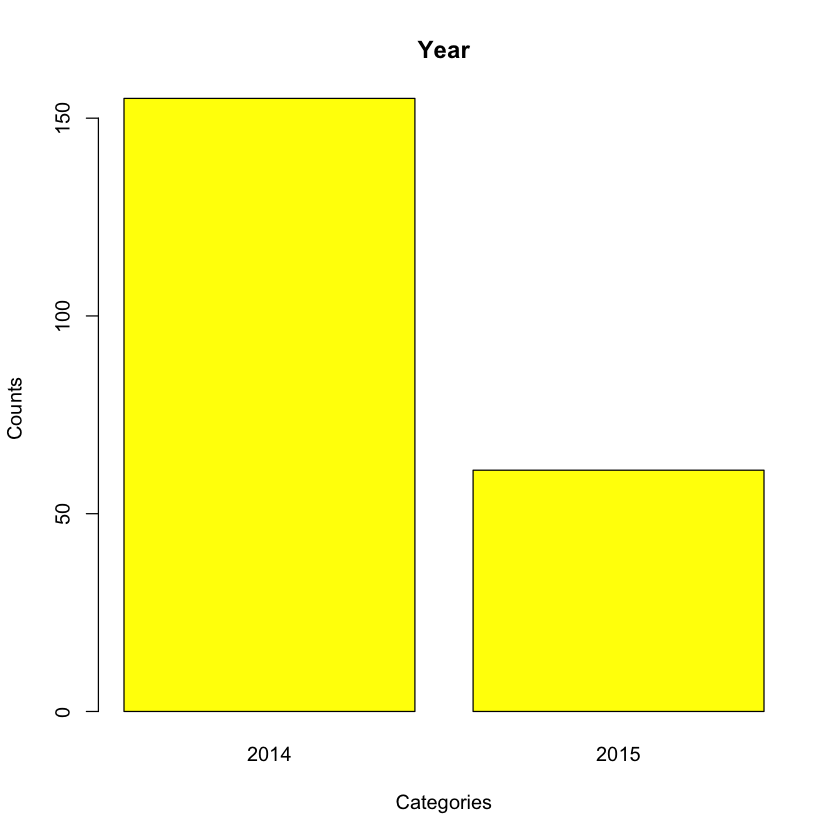

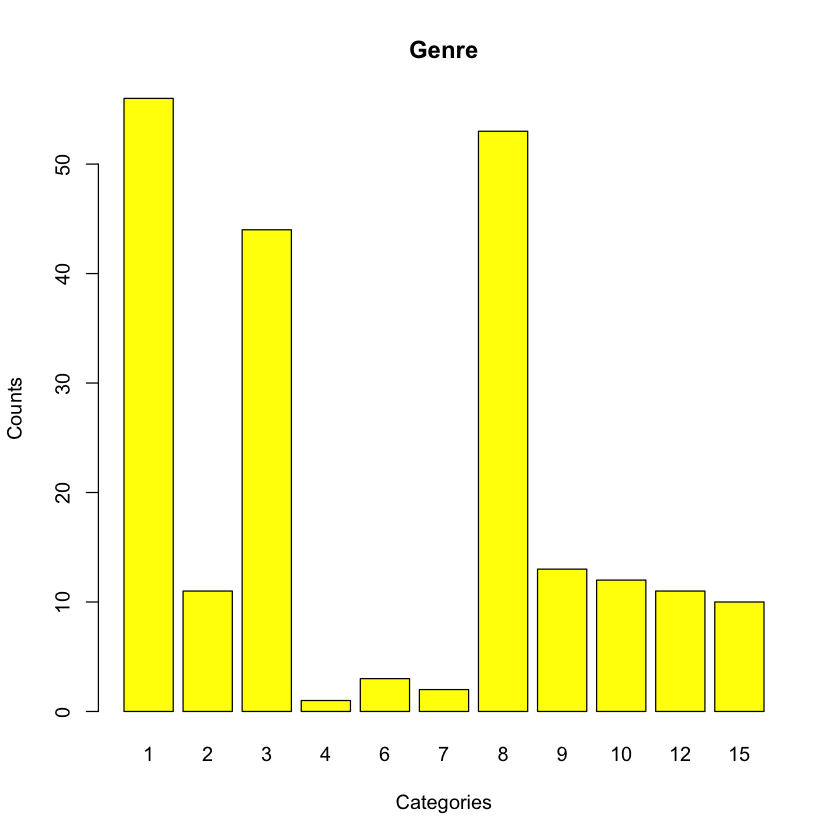

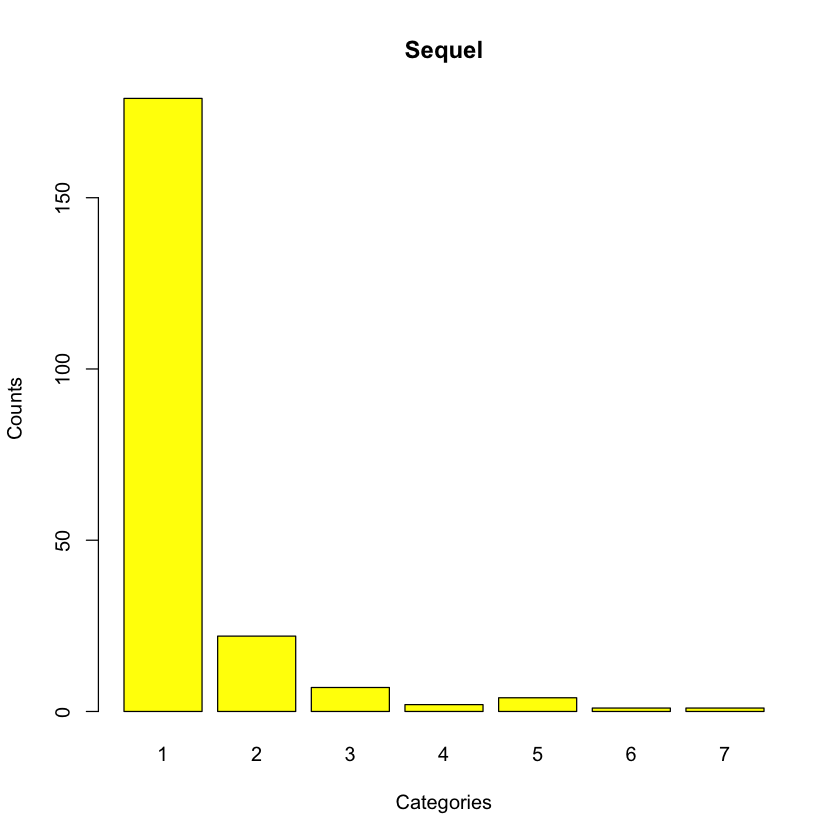

In [34]:
for (col in ploai_cols){
    # Tạo bảng tần suất
    counts <- table(df_new[[col]])
    barplot(counts, main = col, xlab = "Categories", ylab = "Counts", col = "yellow")
}

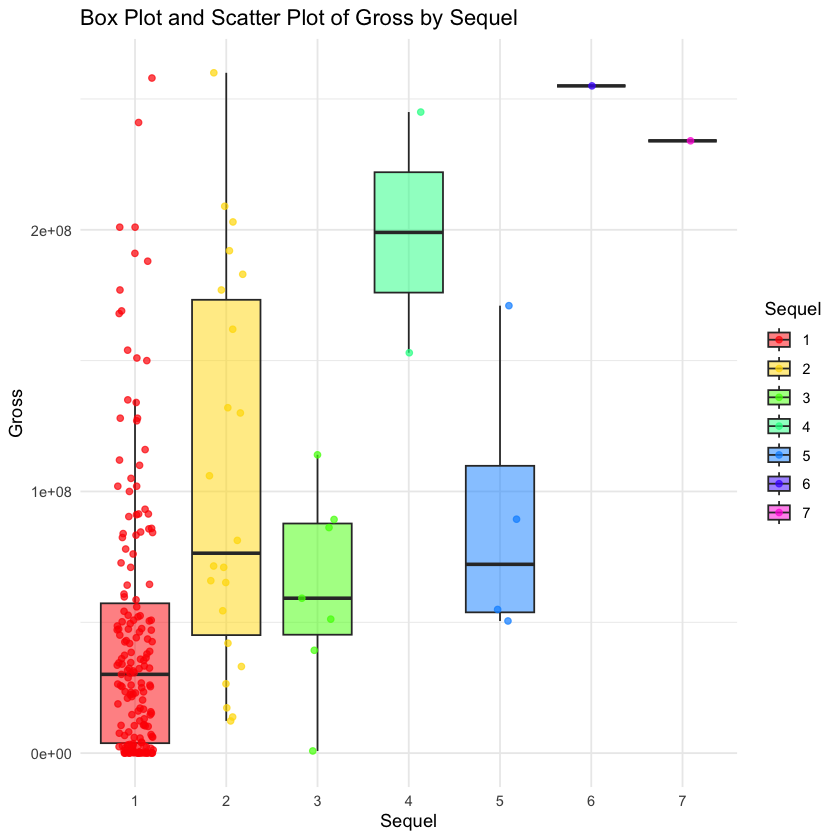

In [76]:
ggplot(df_new, aes(x = Sequel, y = Gross)) +
  geom_boxplot(aes(fill = Sequel), alpha = 0.5, outlier.shape = NA) +  
  geom_point(aes(color = Sequel), position = position_jitter(width = 0.2), alpha = 0.7) +  
  labs(title = "Box Plot and Scatter Plot of Gross by Sequel", x = "Sequel", y = "Gross") +
  theme_minimal() +
  scale_fill_manual(values = rainbow(length(unique(df_new$Sequel)))) +  
  scale_color_manual(values = rainbow(length(unique(df_new$Sequel))))  

- Biểu đồ Box Plot này cung cấp cái nhìn rõ ràng về sự biến thiên của doanh thu phim qua các phần. Các phần phim đầu tiên có sự biến thiên lớn và nhiều ngoại lệ, cho thấy sự không ổn định về doanh thu trong giai đoạn đầu, trong khi các phần phim sau có xu hướng ổn định và doanh thu cao hơn. Điều này có thể cho thấy rằng các phần phim sau đã đạt được sự ổn định và thành công lớn hơn

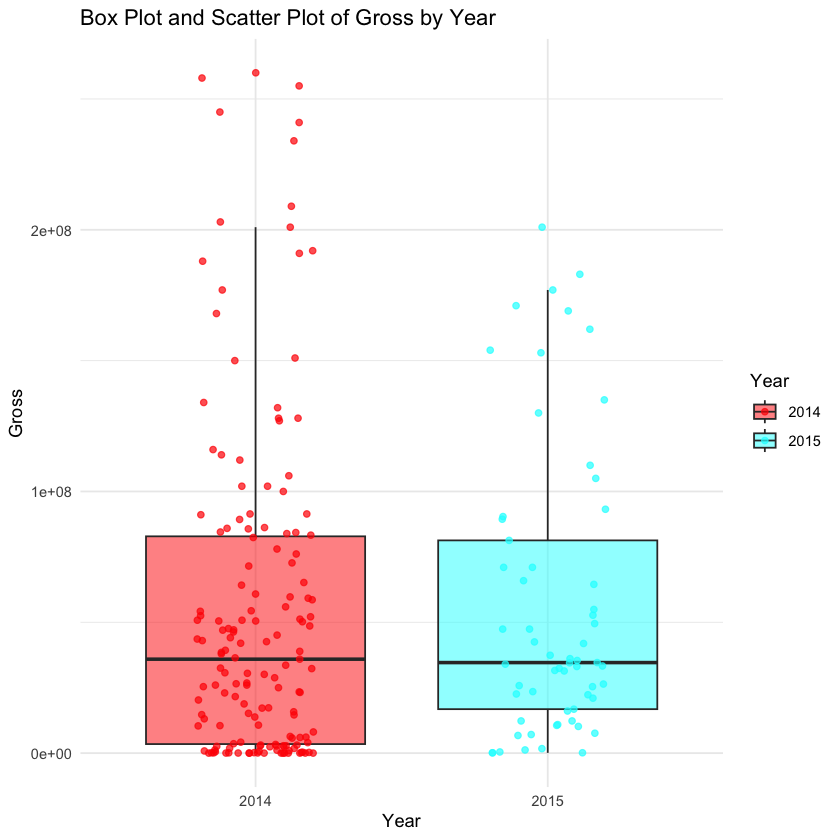

In [75]:
ggplot(df_new, aes(x = Year, y = Gross)) +
  geom_boxplot(aes(fill = Year), alpha = 0.5, outlier.shape = NA) +  
  geom_point(aes(color = Year), position = position_jitter(width = 0.2), alpha = 0.7) +  
  labs(title = "Box Plot and Scatter Plot of Gross by Year", x = "Year", y = "Gross") +
  theme_minimal() +
  scale_fill_manual(values = rainbow(length(unique(df_new$Year)))) +  
  scale_color_manual(values = rainbow(length(unique(df_new$Year))))  

- Mức doanh thu trung bình của phim trong hai năm 2014 và 2015 là gần nhau.
- Doanh thu phim trong năm 2014 có sự biến thiên lớn hơn với nhiều giá trị ngoại lệ, trong khi năm 2015 có sự ổn định hơn.
- Năm 2014 có nhiều giá trị ngoại lệ hơn, cho thấy rằng có một số phim đạt doanh thu rất cao trong năm này.

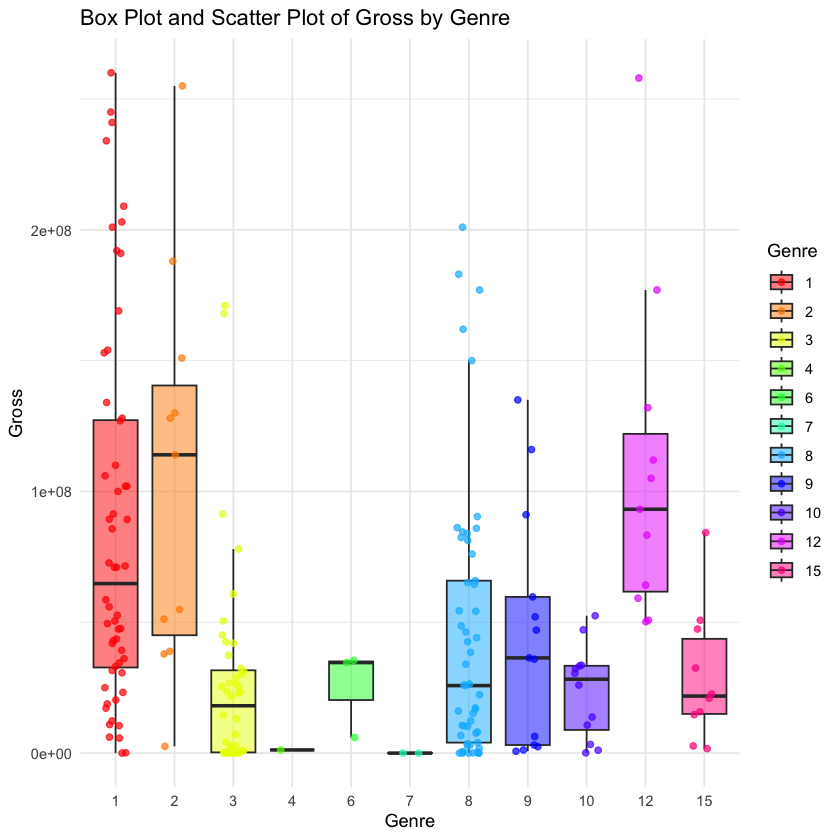

In [74]:
ggplot(df_new, aes(x = Genre, y = Gross)) +
  geom_boxplot(aes(fill = Genre), alpha = 0.5, outlier.shape = NA) +  
  geom_point(aes(color = Genre), position = position_jitter(width = 0.2), alpha = 0.7) +  
  labs(title = "Box Plot and Scatter Plot of Gross by Genre", x = "Genre", y = "Gross") +
  theme_minimal() +
  scale_fill_manual(values = rainbow(length(unique(df_new$Genre)))) +  
  scale_color_manual(values = rainbow(length(unique(df_new$Genre))))  

- Một số thể loại có sự biến thiên lớn về doanh thu (ví dụ: 1, 2, 8), trong khi một số khác có sự ổn định hơn (ví dụ: 3, 7).
- Trung vị doanh thu: Các thể loại như 2, và 12 có trung vị doanh thu cao hơn, cho thấy rằng các thể loại này có xu hướng thu hút nhiều doanh thu hơn.
- Nhiều thể loại có các giá trị ngoại lệ, đặc biệt là các thể loại phổ biến có doanh thu cao, cho thấy rằng có một số phim rất thành công trong những thể loại này.

In [38]:
## As factor 3 biến phân loại:
for (col in ploai_cols){
    df_new[[col]] = as.factor(df_new[[col]])
}

In [39]:
# Lựa chọn ref cho biến phân loại:
# Sequel: 1
# Year: 2014
# Genre: 8
ref_dict <- c(Sequel = "1", Year = "2014", Genre = "1")
## As factor 3 biến phân loại với ref là giá trị có mod cao nhất:
for (col in ploai_cols){
    df_new[[col]] = relevel(df_new[[col]], ref = ref_dict[col])
}


### CHIA BỘ DỮ LIỆU THÀNH TRAIN - TEST DATA

In [40]:
## Phân chia bộ dữ liệu thành 2 tập train.data và test.data
set.seed(42)
sample <- sample(c(TRUE, FALSE), nrow(df_new), replace=TRUE, prob=c(0.8,0.2))
train.data  <- df_new[sample, ]
test.data   <- df_new[!sample, ]
dim(train.data)
dim(test.data)

[1] 172  13

[1] 44 13

### CÂN NHẮC LỰC CHỌN MÔ HÌNH

### KIỂM TRA HIỆN TƯỢNG ĐA CỘNG TUYẾN

In [41]:
df_ltuc = train.data[,ltuc_cols]
mod_reg = lm(Gross ~., data = df_ltuc)
summary(mod_reg)


Call:
lm(formula = Gross ~ ., data = df_ltuc)

Residuals:
      Min        1Q    Median        3Q       Max 
-87924859 -20684917  -5247161  17168470 149506047 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -7.205e+07  2.149e+07  -3.353 0.000997 ***
Ratings                1.161e+07  3.304e+06   3.514 0.000572 ***
Budget                 7.232e-01  6.919e-02  10.452  < 2e-16 ***
Screens                9.066e+03  2.394e+03   3.787 0.000215 ***
Sentiment             -9.734e+05  4.438e+05  -2.193 0.029703 *  
Views                 -4.455e+00  1.763e+00  -2.526 0.012490 *  
Likes                  1.612e+03  5.500e+02   2.931 0.003862 ** 
Dislikes               9.603e+03  5.235e+03   1.834 0.068433 .  
Comments              -5.795e+03  3.040e+03  -1.906 0.058422 .  
`Aggregate Followers`  2.143e+00  6.880e-01   3.115 0.002177 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 35580000 on 162 

In [42]:
vif(mod_reg)

Ratings                Budget               Screens 
             1.219343              1.587435              1.557749 
            Sentiment                 Views                 Likes 
             1.042743              5.537042              5.635709 
             Dislikes              Comments `Aggregate Followers` 
             2.490486              3.867914              1.171051

- Đối với tập dữ liệu train.data, chúng ta có 172 dòng dữ liệu (quan trắc) với 13 biến (bao gồm 9 biến định lượng, 3 biến định tính và biến phụ thuộc Gross). Đây không phải là một tập dữ liệu quá lớn về số lượng biến.
- Chỉ số vif cao nhất cho biến Views và Likes ~ 5.5, đây là một chỉ số cao không đáng kể, có thể xem rằng hầu như không tồn tại hiện tượng đa cộng tuyến đối với các dữ liệu liên tục.
- Rõ ràng các biến phân loại Sequel và Genre có ảnh hưởng đáng kể đến biến Gross (như phần phân tích biến phân loại trong phần trên đã có kết luận), do đó không nên loại bỏ các biến này ra khỏi tập dữ liệu để sử dụng phương pháp Principal Component Regression (PCR).

##### KẾT LUẬN
- Lựa chọn phân tích hồi quy trên dữ liệu gốc cho bài toán này

## MÔ HÌNH

### MÔ HÌNH ĐẦY ĐỦ

In [43]:
# Full model_1: chỉ loại weight
full_model <- lm(Gross ~., data = train.data)
summary(full_model)


Call:
lm(formula = Gross ~ ., data = train.data)

Residuals:
      Min        1Q    Median        3Q       Max 
-86634586 -19152269  -4031614  13082475 144818645 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -7.571e+07  2.506e+07  -3.021 0.002978 ** 
Year2015              -9.471e+06  7.676e+06  -1.234 0.219269    
Ratings                1.312e+07  3.740e+06   3.508 0.000603 ***
Genre2                 2.388e+06  1.368e+07   0.175 0.861624    
Genre3                -1.000e+07  9.446e+06  -1.059 0.291293    
Genre4                -2.385e+07  3.701e+07  -0.644 0.520363    
Genre6                -6.202e+07  3.649e+07  -1.700 0.091339 .  
Genre7                -1.979e+07  3.668e+07  -0.539 0.590452    
Genre8                -7.273e+06  9.017e+06  -0.807 0.421236    
Genre9                 5.233e+06  1.270e+07   0.412 0.680987    
Genre10               -1.449e+07  1.308e+07  -1.108 0.269796    
Genre12                3.190e+06  1.380e+

#### NHẬN XÉT:
- Hiệu suất mô hình: Mô hình hồi quy tuyến tính này có khả năng giải thích khá tốt phương sai của biến phụ thuộc, với R-squared là 0.7144 và Adjusted R-squared là 0.6631.
- Ý nghĩa thống kê: F-statistic cao và p-value rất nhỏ cho thấy rằng mô hình tổng thể là có ý nghĩa thống kê và ít nhất một trong các biến độc lập có ảnh hưởng đáng kể đến biến phụ thuộc.
- Độ biến động: Residual Standard Error khá lớn, cho thấy sự biến động cao xung quanh đường hồi quy, điều này có thể chỉ ra rằng vẫn có các yếu tố khác không được mô hình giải thích.


- Với mức ý nghĩa alpha = 0.05
- Intercept (Hệ số chặn): Pr(>|t|): 0.002978: Hệ số chặn có ý nghĩa thống kê (p-value < alpha). Nếu tất cả các biến độc lập bằng 0, doanh thu dự đoán sẽ là -75.71 triệu đơn vị.
- Year2015: Pr(>|t|): 0.219269 > alpha: Không có ý nghĩa thống kê
- Ratings: Pr(>|t|): 0.000603 < alpha: Có ý nghĩa thống kê rất mạnh (p-value < 0.001). Khi rating tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 13.12 triệu đơn vị.
- Genre: Một số thể loại có ý nghĩa thống kê, chẳng hạn như Genre6 (p-value ≈ 0.091339) và Genre15 (p-value ≈ 0.468619), nhưng nhiều thể loại không có ý nghĩa thống kê. Điều này cho thấy ảnh hưởng của từng thể loại phim đến doanh thu có sự khác biệt lớn và phần lớn không có ý nghĩa thống kê riêng lẻ.
- Budget: Pr(>|t|): 2.08e-10: Có ý nghĩa thống kê rất mạnh (p-value < 0.001). Khi ngân sách tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 0.6176 đơn vị.
- Pr(>|t|): 0.000217: Có ý nghĩa thống kê rất mạnh (p-value < 0.001). Khi số rạp tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 9.81 nghìn đơn vị.
- Sequel: Sequel2: p-value < 0.05, có ý nghĩa thống kê. Các phần khác không có ý nghĩa thống kê riêng lẻ (p-value > 0.05).
- Sentiment: Pr(>|t|): 0.144504: Không có ý nghĩa thống kê (p-value > 0.05).
- Views: p-value ≈ 0.052280, gần ngưỡng ý nghĩa thống kê (0.05).
- Likes: p-value = 0.007707 < 0.01, có ý nghĩa thống kê. Khi Likes tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 1.614e+03 đơn vị
- Dislikes và Comments: không có ý nghĩa thống kê riêng lẻ (p-value > 0.05)
- Aggregate Followers: Pr(>|t|): 0.036663: Có ý nghĩa thống kê (p-value < 0.05). Khi biến này tăng 1 đơn vị thì Gross tăng 1.553e+00

In [44]:
AIC(full_model)

[1] 6494.084

## TÌM MÔ HÌNH RÚT GỌN BẰNG PHƯƠNG PHÁP STEPWISE

#### Giải thích param của stepAIC model được sử dụng trong bài:
- stepAIC: Sử dụng tiêu chí AIC để chọn mô hình tốt nhất (k = 2).
- full_model = lm(mpg ~., data = train.data): Bắt đầu với mô hình đầy đủ gồm tất cả các biến độc lập.
- direction = "both": Sử dụng cả phương pháp thêm biến và loại bỏ biến để tìm ra mô hình tối ưu.
- trace = FALSE chỉ định rằng quá trình lựa chọn mô hình sẽ không hiển thị chi tiết từng bước thực hiện.

In [45]:
step_model <- stepAIC(full_model, direction = "both", trace = FALSE)
step_model


Call:
lm(formula = Gross ~ Year + Ratings + Budget + Screens + Views + 
    Likes + Dislikes + Comments + `Aggregate Followers`, data = train.data)

Coefficients:
          (Intercept)               Year2015                Ratings  
           -6.737e+07             -1.680e+07              1.064e+07  
               Budget                Screens                  Views  
            7.221e-01              1.020e+04             -4.450e+00  
                Likes               Dislikes               Comments  
            1.929e+03              1.196e+04             -7.862e+03  
`Aggregate Followers`  
            1.893e+00  


#### NHẬN XÉT

- Phương pháp Stepwise đã lựa chọn các biến quan trọng và loại bỏ các biến không có ý nghĩa thống kê. Các biến được giữ lại trong mô hình cuối cùng bao gồm Year, Ratings, Budget, Screens, Views, Likes, Dislikes, Comments, và Aggregate Followers. Các biến này có ý nghĩa thống kê và đóng góp vào mô hình dự đoán doanh thu (Gross).

- Intercept (Hệ số chặn): Estimate: -6.737e+07: Ý nghĩa: Giá trị dự đoán của Gross khi tất cả các biến độc lập bằng 0 là -67.37 triệu đơn vị.
- Year2015: Estimate: -1.680e+07: Ý nghĩa: Khi năm là 2015, doanh thu dự đoán sẽ giảm 16.80 triệu đơn vị so với năm gốc.
- Ratings: Estimate: 1.064e+07: Ý nghĩa: Khi Ratings tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 10.64 triệu đơn vị.
- Budget: Estimate: 7.221e-01: Ý nghĩa: Khi Budget tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 0.7221 đơn vị.
- Screens: Estimate: 1.020e+04: Ý nghĩa: Khi Screens tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 10.2 nghìn đơn vị.
- Views: Estimate: -4.450e+00: Ý nghĩa: Khi Views tăng 1 đơn vị, doanh thu dự đoán sẽ giảm 4.45 đơn vị.
- Likes: Estimate: 1.929e+03: Ý nghĩa: Khi Likes tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 1.929 nghìn đơn vị.
- Dislikes: Estimate: 1.196e+04: Ý nghĩa: Khi Dislikes tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 11.96 nghìn đơn vị.
- Comments: Estimate: -7.862e+03: Ý nghĩa: Khi Comments tăng 1 đơn vị, doanh thu dự đoán sẽ giảm 7.862 nghìn đơn vị.
- Aggregate Followers: Estimate: 1.893e+00: Ý nghĩa: Khi Aggregate Followers tăng 1 đơn vị, doanh thu dự đoán sẽ tăng 1.893 đơn vị.

In [46]:
summary(step_model)


Call:
lm(formula = Gross ~ Year + Ratings + Budget + Screens + Views + 
    Likes + Dislikes + Comments + `Aggregate Followers`, data = train.data)

Residuals:
      Min        1Q    Median        3Q       Max 
-80308689 -19469643  -5231855  17282108 151070106 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -6.737e+07  2.143e+07  -3.144 0.001980 ** 
Year2015              -1.680e+07  6.687e+06  -2.512 0.012985 *  
Ratings                1.064e+07  3.270e+06   3.255 0.001380 ** 
Budget                 7.221e-01  6.889e-02  10.482  < 2e-16 ***
Screens                1.020e+04  2.419e+03   4.216 4.13e-05 ***
Views                 -4.450e+00  1.755e+00  -2.535 0.012181 *  
Likes                  1.929e+03  5.697e+02   3.385 0.000892 ***
Dislikes               1.196e+04  5.275e+03   2.267 0.024718 *  
Comments              -7.862e+03  3.127e+03  -2.514 0.012907 *  
`Aggregate Followers`  1.893e+00  6.992e-01   2.707 0.007515 ** 
---
Sig

#### NHẬN XÉT: 
- Khoảng 68.02% phương sai của biến phụ thuộc (Gross) được giải thích bởi mô hình này.
- Giá trị F-statistic cao và p-value rất nhỏ cho thấy rằng mô hình tổng thể có ý nghĩa thống kê, nghĩa là ít nhất một trong các hệ số hồi quy không bằng không.

- Với mức ý nghĩa alpha = 0.05:
- Hệ số chặn có ý nghĩa thống kê (p-value = 0.001980 < alpha)
- Year2015: Hệ số này có ý nghĩa thống kê (p-value = 0.012985 < alpha)
- Ratings: Hệ số này có ý nghĩa thống kê (p-value = 0.001380 < alpha).
- Budget: Hệ số này có ý nghĩa thống kê rất mạnh (p-value < 2e-16 < alpha).
- Screens: Hệ số này có ý nghĩa thống kê rất mạnh (p-value = 4.13e-05 < alpha).
- Views: Hệ số này có ý nghĩa thống kê (p-value =  0.012181 < alpha).
- Likes:  Hệ số này có ý nghĩa thống kê rất mạnh (p-value = 0.000892 < alpha).
- Dislikes: Hệ số này có ý nghĩa thống kê (p-value = 0.024718 < 0.05).
- Comments: Hệ số này có ý nghĩa thống kê (p-value = 0.012907 < 0.05).
- Aggregate Followers: Hệ số này có ý nghĩa thống kê (p-value = 0.007515< alpha)

- Multiple R-squared và Adjusted R-squared đều cao, cho thấy mô hình giải thích tốt phương sai của biến phụ thuộc.
- Các biến như Ratings, Budget, Screens, Likes, Dislikes, Comments, và Aggregate Followers đều có ý nghĩa thống kê và đóng góp đáng kể vào mô hình.
- Hầu hết các biến trong mô hình đều có ý nghĩa thống kê với các mức ý nghĩa khác nhau (p-value < 0.05, p-value < 0.01, p-value < 0.001).

## KIỂM TRA CÁC GIẢ ĐỊNH

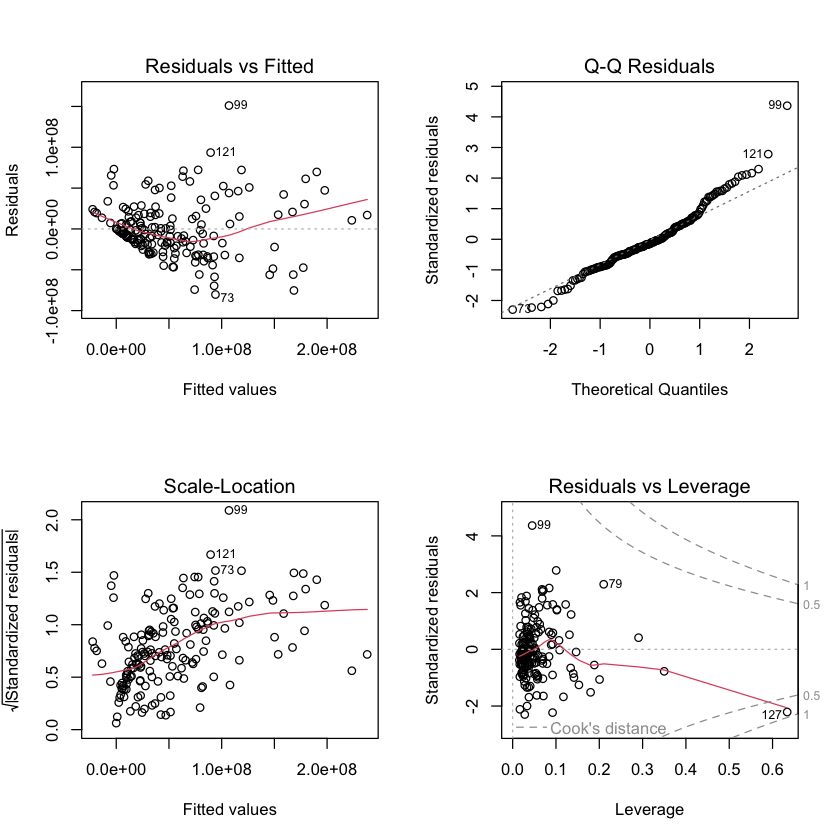

In [47]:
# Plot residuals
par(mfrow = c(2, 2))
plot(step_model)

### KIỂM ĐỊNH PHƯƠNG SAI KHÔNG ĐỔI (Homoscedasticity)

- Giả thuyết gốc (H0): Phương sai của phần dư là không đổi (homoscedasticity).
- Giả thuyết đối (H1): Phương sai của phần dư thay đổi (heteroscedasticity)

In [48]:
bptest(step_model)


	studentized Breusch-Pagan test

data:  step_model
BP = 19.305, df = 9, p-value = 0.02272


- p-value = 0.02272 < 0.05: 
- Với mức ý nghĩa 0.05, ta bác bỏ giả thuyết gốc. Điều này có nghĩa là có dấu hiệu của heteroscedasticity trong mô hình hồi quy tuyến tính


### KIỂM ĐỊNHH PHÂN PHỐI CHUẨN CỦA PHẦN DƯ ((Normality of Residuals))

- Giả thuyết gốc (H0): Phần dư có phân phối chuẩn.
- Giả thuyết đối (H1): Phần dư không có phân phối chuẩn.

In [49]:
# Thực hiện kiểm định Shapiro-Wilk
shapiro.test(residuals(step_model))


	Shapiro-Wilk normality test

data:  residuals(step_model)
W = 0.965, p-value = 0.0002553


- W (Shapiro-Wilk statistic): 0.965
- p-value: 0.0002553
- p-value = 0.0002553 < 0.05: Với mức ý nghĩa 0.05, ta bác bỏ giả thuyết gốc. Điều này có nghĩa là phần dư của mô hình hồi quy không có phân phối chuẩn.

### KIỂM ĐỊNH TỰ TƯƠNG QUAN (AUTOCORRELATION)

- Giả thuyết gốc (H0): Không có tự tương quan (rho = 0).
- Giả thuyết đối (H1): Có tự tương quan (rho ≠ 0).

In [50]:
# Thực hiện kiểm định Durbin-Watson
durbinWatsonTest(step_model)

 lag Autocorrelation D-W Statistic p-value
   1      0.01106812      1.976103   0.858
 Alternative hypothesis: rho != 0

- D-W Statistic ≈ 1.976: Giá trị này rất gần với 2, cho thấy không có tự tương quan đáng kể trong phần dư.
- p-value = 0.824 > 0.05: Với mức ý nghĩa 0.05, ta không thể bác bỏ giả thuyết gốc. Điều này có nghĩa là không có dấu hiệu của tự tương quan trong phần dư của mô hình hồi quy.


- Dựa trên kết quả kiểm định Durbin-Watson, không có bằng chứng để kết luận rằng phần dư của mô hình hồi quy có tự tương quan. Điều này cho thấy mô hình hồi quy thỏa mãn giả định về tự tương quan của phần dư.

### KẾT LUẬN:
- Mô hình step_model = lm(formula = Gross ~ Year + Ratings + Budget + Screens + Views + 
    Likes + Dislikes + Comments + `Aggregate Followers`, data = train.data)
không thoả mãn 2 giải thiết:
    - Phương sai của phần dữ là không đổi
    - Phần dư có phân phối chuẩn
- Do đó ta cần tìm một phương pháp khác phù hợp hơn

### BIẾN ĐỔI TRANSFORMATION (PP BOX-COX) VÀ XÂY DỰNG LẠI MÔ HÌNH

Gia thi Lambda tot nhat: 0.3838384 


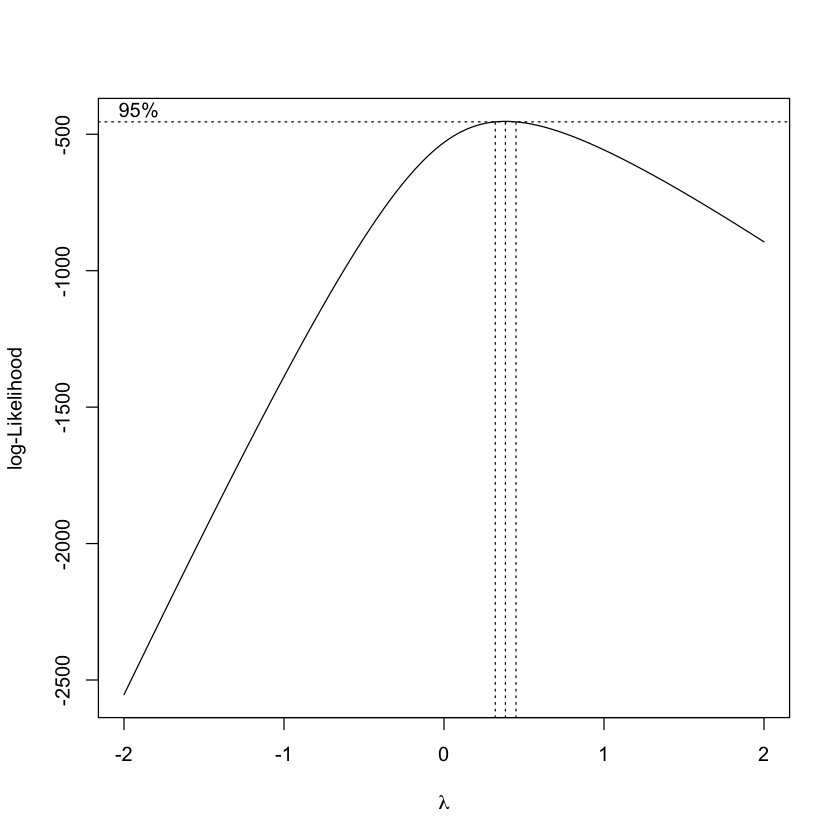

In [51]:
# Tính toán lambda cho biến đổi Box-Cox
boxcox_result <- boxcox(lm(Gross ~ ., data = train.data), plotit = TRUE)
lambda <- boxcox_result$x[which.max(boxcox_result$y)]
cat("Gia thi Lambda tot nhat:", lambda, "\n")


In [52]:
# Áp dụng biến đổi Box-Cox lên biến Gross
box_cox_train.data = train.data  # Tạo bộ dữ liệu mới từ tập train.data
box_cox_train.data$Gross <- (box_cox_train.data$Gross^lambda - 1) / lambda #Biến đổi cột Gross 


In [53]:
boxcox_full_model <- lm(Gross ~ ., data = box_cox_train.data)
boxcox_step_model <- stepAIC(boxcox_full_model, direction = "both", trace = FALSE)
boxcox_step_model


Call:
lm(formula = Gross ~ Year + Ratings + Budget + Screens + Views + 
    Likes + Dislikes + Comments + `Aggregate Followers`, data = box_cox_train.data)

Coefficients:
          (Intercept)               Year2015                Ratings  
           -3.932e+02             -2.310e+02              1.992e+02  
               Budget                Screens                  Views  
            9.572e-06              2.732e-01             -4.977e-05  
                Likes               Dislikes               Comments  
            3.176e-02              2.009e-01             -1.111e-01  
`Aggregate Followers`  
            3.097e-05  


In [54]:
summary(boxcox_step_model)


Call:
lm(formula = Gross ~ Year + Ratings + Budget + Screens + Views + 
    Likes + Dislikes + Comments + `Aggregate Followers`, data = box_cox_train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2162.74  -434.10   -32.03   453.16  1841.83 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.932e+02  4.224e+02  -0.931  0.35337    
Year2015              -2.310e+02  1.318e+02  -1.752  0.08160 .  
Ratings                1.992e+02  6.446e+01   3.090  0.00236 ** 
Budget                 9.572e-06  1.358e-06   7.048 4.96e-11 ***
Screens                2.732e-01  4.769e-02   5.728 4.83e-08 ***
Views                 -4.977e-05  3.460e-05  -1.438  0.15229    
Likes                  3.176e-02  1.123e-02   2.827  0.00529 ** 
Dislikes               2.009e-01  1.040e-01   1.932  0.05507 .  
Comments              -1.111e-01  6.165e-02  -1.801  0.07351 .  
`Aggregate Followers`  3.097e-05  1.378e-05   2.247  0.02602 *  
---
Signi

### NHẬN XÉT:
- Với mức ý nghĩa alpha = 0.05
- Sau khi biến đổi Box-cox
- Mô hình được lựa chọn bằng phương pháp stepwise lm(formula = Gross ~ Year + Ratings + Budget + Screens + Views + Likes + Dislikes + Comments + `Aggregate Followers`, data = box_cox_train.data) cho kết quả:
- Intercept (Hệ số chặn): pvalue = 0.35337 > alpha: Hệ số chặn không có ý nghĩa thống kê, cho thấy giá trị dự đoán của Gross khi tất cả các biến độc lập bằng 0 không đáng kể.
- Year2015: Khi năm là 2015, doanh thu dự đoán giảm 231 đơn vị  so với năm gốc (năm 2014)
- Ratings: có ý nghĩa thống kê: p-value = 0.00236 < alpha. Khi Ratings tăng 1 đơn vị, doanh thu dự đoán tăng 199.2 đơn vị
- Budget: có ý nghĩa thống kê: p-value = 4.96e-11 < alpha. Khi Budget tăng 1 đơn vị, doanh thu dự đoán tăng 9.572e-06 đơn vị
- Screens: có ý nghĩa thống kê: p-value = 4.83e-08 < alpha. Khi Screens tăng 1 đơn vị, doanh thu dự đoán tăng 0.2732 đơn vị.
- Views: không ý nghĩa thống kê: p-value = 0.15229 > alpha.
- Likes: có ý nghĩa thống kê: p-value = 0.00529 < alpha. Khi Likes tăng 1 đơn vị, doanh thu dự đoán tăng 0.03176 đơn vị.
-  Dislikes: Không có ý nghĩa thống kê với mức ý nghĩa alpha = 0.05.
- Comments: có ý nghĩa thống kê: p-value = 0.02602 < alpha . Không có ý nghĩa thống kê với mức ý nghĩa alpha = 0.05.
- Aggregate Followers: Khi Aggregate Followers tăng 1 đơn vị, doanh thu dự đoán tăng 3.097e-05 đơn vị

Tuy nhiên trong mô hình này ta thấy rằng một số biến không có ý nghĩa thống kê với mức ý nghĩa alpha, do đó ta xem xét thực hiện loại bỏ lần lượt từng biến và kiểm tra lại mô hình

#### LOẠI BIẾN VIEW

In [55]:
boxcox_step_model_2 = lm(formula = Gross ~ Year + Ratings + Budget + Screens + 
    Likes + Dislikes + Comments + `Aggregate Followers`, data = box_cox_train.data)

In [56]:
summary(boxcox_step_model_2)


Call:
lm(formula = Gross ~ Year + Ratings + Budget + Screens + Likes + 
    Dislikes + Comments + `Aggregate Followers`, data = box_cox_train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2161.04  -462.94   -39.58   461.66  1891.35 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.285e+02  4.231e+02  -1.013  0.31264    
Year2015              -2.231e+02  1.322e+02  -1.688  0.09326 .  
Ratings                1.999e+02  6.467e+01   3.092  0.00234 ** 
Budget                 9.595e-06  1.362e-06   7.043 5.01e-11 ***
Screens                2.792e-01  4.766e-02   5.858 2.51e-08 ***
Likes                  2.232e-02  9.146e-03   2.440  0.01575 *  
Dislikes               1.573e-01  9.979e-02   1.576  0.11694    
Comments              -1.278e-01  6.074e-02  -2.105  0.03686 *  
`Aggregate Followers`  2.692e-05  1.354e-05   1.988  0.04846 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stand

#### KIỂM ĐỊNH FISHER TỪNG PHẦN

- Giả thuyết gốc (H0): Không có sự khác biệt đáng kể giữa hai mô hình boxcox_step_model và boxcox_step_model_2
- Giả thuyết đối (H1): Có sự khác biệt đáng kể giữa hai mô hình.

In [57]:
anova(boxcox_step_model, boxcox_step_model_2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,162,79014044,NA,NA,NA,NA
2,163,80022991,-1,-1008947,2.068612,0.1522873


p-value = 0.1522873 > 0.05: Với mức ý nghĩa 0.05, ta không thể bác bỏ giả thuyết gốc. Điều này có nghĩa là không có đủ bằng chứng để kết luận rằng hai mô hình khác nhau đáng kể.

- Vậy việc loại bỏ biến Views là có ý nghĩa
- Tuy nhiên sau khi loại bỏ biến Views, ta vẫn thấy rằng biến Dislikes có p-value = 0.11694 > alpha không có ý nghĩa trong mô hình, nên em quyết định test thử với mô hình loại bỏ biết Dislikes

#### LOẠI BIẾN DISLIKES

In [58]:
boxcox_step_model_3 = lm(formula = Gross ~ Year + Ratings + Budget + Screens + 
    Likes + Comments + `Aggregate Followers`, data = box_cox_train.data)
summary(boxcox_step_model_3)


Call:
lm(formula = Gross ~ Year + Ratings + Budget + Screens + Likes + 
    Comments + `Aggregate Followers`, data = box_cox_train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2177.81  -464.27   -48.07   458.27  1901.69 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.574e+02  4.108e+02  -0.627  0.53173    
Year2015              -1.918e+02  1.312e+02  -1.461  0.14582    
Ratings                1.708e+02  6.225e+01   2.744  0.00675 ** 
Budget                 9.694e-06  1.367e-06   7.090 3.79e-11 ***
Screens                2.852e-01  4.772e-02   5.977 1.37e-08 ***
Likes                  2.477e-02  9.054e-03   2.736  0.00691 ** 
Comments              -9.413e-02  5.711e-02  -1.648  0.10120    
`Aggregate Followers`  2.971e-05  1.348e-05   2.204  0.02891 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 703.8 on 164 degrees of freedom
Multiple R-squared:  0.6146,	Adju

#### KIỂM ĐỊNH FISHER TỪNG PHẦN

- Giả thuyết gốc (H0): Không có sự khác biệt đáng kể giữa hai mô hình boxcox_step_model_2 và boxcox_step_model_3
- Giả thuyết đối (H1): Có sự khác biệt đáng kể giữa hai mô hình.

In [59]:
anova(boxcox_step_model_2, boxcox_step_model_3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,163,80022991,NA,NA,NA,NA
2,164,81242533,-1,-1219541,2.484102,0.1169408


- p-value = 0.1169408 > 0.05: Với mức ý nghĩa 0.05, ta không thể bác bỏ giả thuyết gốc. Điều này có nghĩa là không có đủ bằng chứng để kết luận rằng hai mô hình khác nhau đáng kể.

- Vậy việc loại bỏ biến Dislikes là có ý nghĩa
- Tuy nhiên sau khi loại bỏ biến Dislikes, ta vẫn thấy rằng biến Comments có p-value = 0.10120 > alpha không có ý nghĩa trong mô hình, nên em quyết định test thử với mô hình loại bỏ biết Comments

#### LOẠI BIẾN COMMENTS

In [60]:
boxcox_step_model_4 = lm(formula = Gross ~ Year + Ratings + Budget + Screens + 
    Likes + `Aggregate Followers`, data = box_cox_train.data)
summary(boxcox_step_model_4)


Call:
lm(formula = Gross ~ Year + Ratings + Budget + Screens + Likes + 
    `Aggregate Followers`, data = box_cox_train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2142.35  -457.89   -59.65   459.16  1922.17 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.475e+02  4.093e+02  -0.849  0.39712    
Year2015              -1.423e+02  1.284e+02  -1.108  0.26940    
Ratings                1.832e+02  6.212e+01   2.949  0.00366 ** 
Budget                 9.159e-06  1.335e-06   6.860 1.32e-10 ***
Screens                2.853e-01  4.797e-02   5.948 1.58e-08 ***
Likes                  1.248e-02  5.165e-03   2.417  0.01675 *  
`Aggregate Followers`  3.414e-05  1.328e-05   2.571  0.01103 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 707.5 on 165 degrees of freedom
Multiple R-squared:  0.6082,	Adjusted R-squared:  0.5939 
F-statistic: 42.68 on 6 and 165 DF,  p-value: < 2.2

#### KIỂM ĐỊNH FISHER TỪNG PHẦN

- Giả thuyết gốc (H0): Không có sự khác biệt đáng kể giữa hai mô hình boxcox_step_model_3 và boxcox_step_model_4
- Giả thuyết đối (H1): Có sự khác biệt đáng kể giữa hai mô hình.

In [61]:
anova(boxcox_step_model_3, boxcox_step_model_4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,164,81242533,NA,NA,NA,NA
2,165,82588476,-1,-1345943,2.716984,0.1011999


- p-value = 0.1011999 > 0.05: Với mức ý nghĩa 0.05, ta không thể bác bỏ giả thuyết gốc. Điều này có nghĩa là không có đủ bằng chứng để kết luận rằng hai mô hình khác nhau đáng kể.

- Vậy việc loại bỏ biến Comments là có ý nghĩa
- Tuy nhiên sau khi loại bỏ biến Comments, ta vẫn thấy rằng biến Year2015 có p-value = 0.26940> alpha không có ý nghĩa trong mô hình, nên em quyết định test thử với mô hình loại bỏ biết Year

#### LOẠI BỎ BIẾN YEAR

In [62]:
boxcox_step_model_5 = lm(formula = Gross ~ Ratings + Budget + Screens + 
    Likes + `Aggregate Followers`, data = box_cox_train.data)
summary(boxcox_step_model_5)


Call:
lm(formula = Gross ~ Ratings + Budget + Screens + Likes + `Aggregate Followers`, 
    data = box_cox_train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2106.36  -473.57   -51.87   491.03  1809.36 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -3.811e+02  4.084e+02  -0.933  0.35210    
Ratings                1.858e+02  6.211e+01   2.992  0.00319 ** 
Budget                 9.315e-06  1.329e-06   7.012 5.66e-11 ***
Screens                2.749e-01  4.707e-02   5.840 2.68e-08 ***
Likes                  1.073e-02  4.920e-03   2.181  0.03061 *  
`Aggregate Followers`  3.679e-05  1.307e-05   2.815  0.00547 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 708 on 166 degrees of freedom
Multiple R-squared:  0.6053,	Adjusted R-squared:  0.5934 
F-statistic: 50.91 on 5 and 166 DF,  p-value: < 2.2e-16


#### KIỂM ĐỊNH FISHER TỪNG PHẦN

- Giả thuyết gốc (H0): Không có sự khác biệt đáng kể giữa hai mô hình boxcox_step_model_4 và boxcox_step_model_5
- Giả thuyết đối (H1): Có sự khác biệt đáng kể giữa hai mô hình.

In [63]:
anova(boxcox_step_model_4, boxcox_step_model_5)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,165,82588476,NA,NA,NA,NA
2,166,83203152,-1,-614676.1,1.228035,0.2694022


- p-value = 0.1011999 > 0.05: Với mức ý nghĩa 0.05, ta không thể bác bỏ giả thuyết gốc. Điều này có nghĩa là không có đủ bằng chứng để kết luận rằng hai mô hình khác nhau đáng kể.

- Vậy việc loại bỏ biến Year là có ý nghĩa và ta thấy rằng, sau khi loại bỏ biến Year, các biến độc lập để xây dựng mô hình đều có ý nghĩa


### KIỂM TRA CÁC GIẢ ĐỊNH CHO MÔ HÌNH boxcox_step_model_5

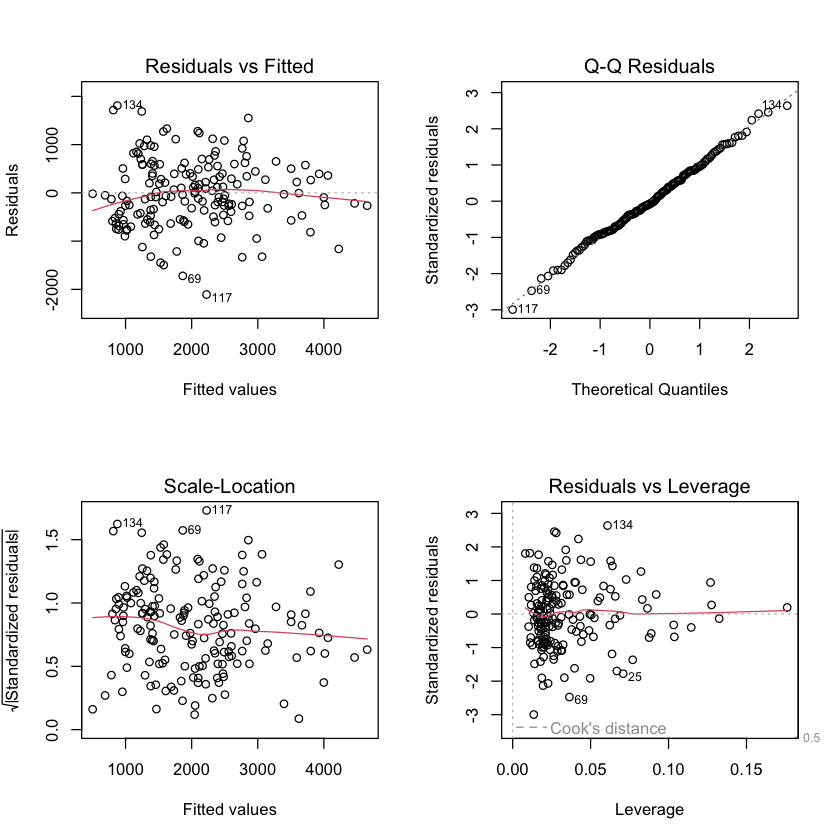

In [64]:
# Plot residuals
par(mfrow = c(2, 2))
plot(boxcox_step_model_5)

### KIỂM ĐỊNHH PHÂN PHỐI CHUẨN CỦA PHẦN DƯ ((Normality of Residuals))
- Giả thuyết gốc (H0): Phần dư có phân phối chuẩn.
- Giả thuyết đối (H1): Phần dư không có phân phối chuẩn.

In [65]:
shapiro.test(residuals(boxcox_step_model_5))


	Shapiro-Wilk normality test

data:  residuals(boxcox_step_model_5)
W = 0.99624, p-value = 0.9474


- p-value = 0.9474 > 0.05: Với mức ý nghĩa 0.05, ta không thể bác bỏ giả thuyết gốc. Điều này có nghĩa là không có đủ bằng chứng để kết luận rằng phần dư của mô hình không có phân phối chuẩn. Nói cách khác, phần dư có thể được coi là có phân phối chuẩn.

- Phần dư của mô hình hồi quy boxcox_step_model_5 sau khi biến đổi Box-Cox có phân phối gần với phân phối chuẩn. Điều này cho thấy giả định phân phối chuẩn của phần dư đã được thoả mãn

### KIỂM ĐỊNH TỰ TƯƠNG QUAN (AUTOCORRELATION)
- Giả thuyết gốc (H0): Không có tự tương quan (rho = 0).
- Giả thuyết đối (H1): Có tự tương quan (rho ≠ 0).

In [66]:
durbinWatsonTest(boxcox_step_model_5)


 lag Autocorrelation D-W Statistic p-value
   1       0.0563064      1.887167   0.458
 Alternative hypothesis: rho != 0

- D-W Statistic ≈ 1.887167: Giá trị này gần với 2, cho thấy không có tự tương quan đáng kể trong phần dư.
- p-value = 0.442 > 0.05: Với mức ý nghĩa 0.05, ta không thể bác bỏ giả thuyết gốc. Điều này có nghĩa là không có dấu hiệu của tự tương quan trong phần dư của mô hình hồi quy.

- Phần dư của mô hình hồi quy boxcox_step_model_5 không có tự tương quan đáng kể. Điều này cho thấy giả định về không có tự tương quan của phần dư được thỏa mãn.

### KIỂM ĐỊNH PHƯƠNG SAI KHÔNG ĐỔI (Homoscedasticity)
- Giả thuyết gốc (H0): Phương sai của phần dư là không đổi (homoscedasticity).
- Giả thuyết đối (H1): Phương sai của phần dư thay đổi (heteroscedasticity)

In [67]:
bptest(boxcox_step_model_5)


	studentized Breusch-Pagan test

data:  boxcox_step_model_5
BP = 3.6353, df = 5, p-value = 0.603


- p-value = 0.603 > 0.05: Với mức ý nghĩa 0.05, ta không thể bác bỏ giả thuyết gốc. Điều này có nghĩa là không có đủ bằng chứng để kết luận rằng phần dư của mô hình có phương sai thay đổi. Nói cách khác, phần dư có phương sai không đổi (homoscedasticity)

- Phần dư của mô hình hồi quy boxcox_step_model_5 có phương sai không đổi. Điều này cho thấy giả định về phương sai không đổi của phần dư được thỏa mãn.

### Ý NGHĨA CỦA MÔ HÌNH
- Mô hình được lựa chọn là mô hình  boxcox_step_model_5 = lm(formula = Gross ~ Ratings + Budget + Screens + Likes + `Aggregate Followers`, data = box_cox_train.data)
- Mô hình này bao gồm các biến độc lập Ratings, Budget, Screens, Likes và Aggregate Followers để dự đoán biến phụ thuộc Gross. Các biến này đã được chọn vì chúng có ý nghĩa thống kê và đóng góp đáng kể vào việc giải thích phương sai của Gross sau khi thực hiện biến đổi Box-Cox.
- Kết quả khi sử dụng mô hình này: Với mức ý nghĩa alpha = 0.05
- Intercept (Hệ số chặn): -381.1:  Giá trị dự đoán của Gross khi tất cả các biến độc lập bằng 0. Hệ số này không có ý nghĩa thống kê (p-value = 0.35210).
- Ratings: 185.:  Khi Ratings tăng 1 đơn vị, Gross dự đoán sẽ tăng 185.8 đơn vị (sau khi biến đổi Box-Cox). Hệ số này có ý nghĩa thống kê (p-value = 0.00319 - **).
- Budget: 9.315e-06:  Khi Budget tăng 1 đơn vị, Gross dự đoán sẽ tăng 9.315e-06 đơn vị (sau khi biến đổi Box-Cox). Hệ số này có ý nghĩa thống kê rất mạnh (p-value = 5.66e-11 - ***).
- Screens: 0.2749:  Khi Screens tăng 1 đơn vị, Gross dự đoán sẽ tăng 0.2749 đơn vị (sau khi biến đổi Box-Cox). Hệ số này có ý nghĩa thống kê rất mạnh (p-value = 2.68e-08 - ***).
- Likes: 0.01073:  Khi Likes tăng 1 đơn vị, Gross dự đoán sẽ tăng 0.01073 đơn vị (sau khi biến đổi Box-Cox). Hệ số này có ý nghĩa thống kê (p-value = 0.03061 *).
- Aggregate Followers: 3.679e-05:  Khi Aggregate Followers tăng 1 đơn vị, Gross dự đoán sẽ tăng 3.679e-05 đơn vị (sau khi biến đổi Box-Cox). Hệ số này có ý nghĩa thống kê (p-value = 0.00547 **).
- Multiple R-squared: 0.6082: Khoảng 60.82% phương sai của biến phụ thuộc (Gross sau khi biến đổi Box-Cox) được giải thích bởi mô hình này.
- Giá trị F-statistic cao và p-value rất nhỏ cho thấy rằng mô hình tổng thể có ý nghĩa thống kê, nghĩa là ít nhất một trong các hệ số hồi quy không bằng không.

### KẾT LUẬN

Mô hình hồi quy tuyến tính được lựa chọn có độ phù hợp cao và các biến độc lập Ratings, Budget, Screens, Likes và Aggregate Followers đều có ý nghĩa thống kê, đóng góp đáng kể vào việc giải thích phương sai của Gross sau khi biến đổi Box-Cox. Các kiểm định giả định của mô hình đều thỏa mãn, giúp tăng độ tin cậy của các ước lượng và kết luận từ mô hình. Mô hình này có thể được sử dụng để dự báo và phân tích doanh thu Gross một cách đáng tin cậy.

## DỰ BÁO

In [68]:
# Thực hiện dự đoán
boxcox_predictions <- boxcox_step_model_5 %>% predict(test.data)

In [69]:
# Chuyển đổi ngược lại giá trị Box-Cox về giá trị ban đầu
if (lambda == 0) {
  original_predictions <- exp(boxcox_predictions)
} else {
  original_predictions <- (boxcox_predictions * lambda + 1)^(1 / lambda)
}

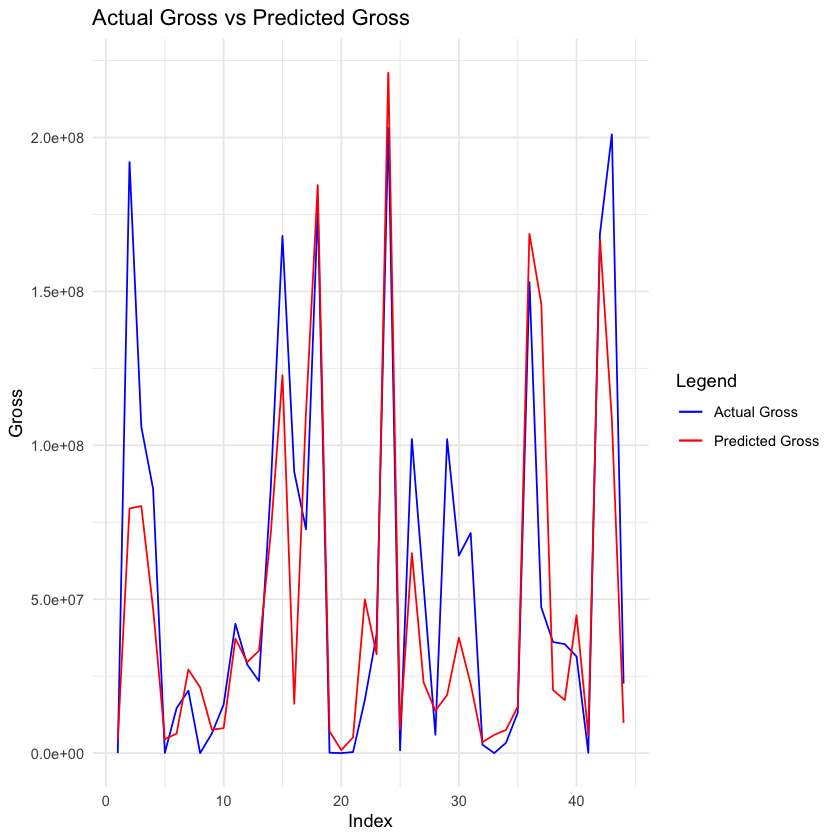

In [70]:
# Giá trị thực và giá trị dự đoán trên cùng 1 biểu đồ
test.data$Gross_prediction = original_predictions
# Plotting
# Plotting with legend
ggplot(test.data, aes(x = 1:nrow(test.data))) +
  geom_line(aes(y = Gross, color = "Actual Gross")) +
  geom_line(aes(y = Gross_prediction, color = "Predicted Gross")) +
  labs(title = "Actual Gross vs Predicted Gross",
       x = "Index",
       y = "Gross",
       color = "Legend") +  # Adding legend title
  scale_color_manual(values = c("Actual Gross" = "blue", "Predicted Gross" = "red")) +
  theme_minimal()

- Các đường Actual Gross và Predicted Gross khá gần nhau, cho thấy mô hình dự đoán khá chính xác.
- Tuy nhiên, có một số điểm mà dự đoán và giá trị thực tế có sự khác biệt đáng kể. Điều này có thể do một số yếu tố ngoài tầm kiểm soát hoặc do biến động lớn trong dữ liệu.
- Giá trị dự đoán theo xu hướng khá ổn định và theo sát giá trị thực tế trong nhiều khoảng dữ liệu.
- Một số điểm ngoại lệ (outliers) trong dữ liệu thực tế có thể làm cho giá trị dự đoán bị lệch.
- Cả hai đường Actual Gross và Predicted Gross đều phản ánh xu hướng chung của dữ liệu, với các đỉnh và đáy xuất hiện tương đồng.

In [71]:
test.data[c("Gross","Gross_prediction")]

Gross,Gross_prediction
<dbl>,<dbl>
9.13e+03,4505499.6
1.92e+08,79471994.6
1.06e+08,80265726.6
8.59e+07,46968570.3
7.23e+04,4512381.1
1.46e+07,6342746.7
2.03e+07,27140931.3
9.84e+03,21357894.9
6.37e+06,7605543.1


In [72]:
ss=RMSE(test.data$Gross_prediction, test.data$Gross)
ss

[1] 36479922

In [73]:
summary(test.data$Gross)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     2470   5315000  33400000  56937471  87275000 203000000 

- Giá trị Gross dao động từ 2,470 đến 2,030,000,000.
- Giá trị trung bình (Mean) là 56,937,471 và giá trị trung vị (Median) là 33,400,000.
- Giá trị RMSE tương đương khoảng 65% của giá trị trung bình, cho thấy mô hình có một số lỗi dự đoán đáng kể, đặc biệt là đối với các giá trị Gross lớn hơn.

### ĐỀ XUẤT PHƯƠNG PHÁP CẢI TIẾN

- Kiểm tra chéo (Cross-validation): Thực hiện kiểm tra chéo để đánh giá độ ổn định và độ chính xác của mô hình trên các tập dữ liệu khác nhau.
- Thử các mô hình máy học khác như Random Forest, Gradient Boosting, hoặc mô hình hồi quy phi tuyến tính để xem liệu có thể cải thiện độ chính xác của dự đoán hay không.